In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime as dt
import os
import json
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sb
import mplfinance as mpf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [2]:
#sns.set_style("whitegrid")
default_figsize = (10, 5)
color1 = "#3c3c3d"
color2 = "#c99d66"
color3 = "#ecf0f1"
color4 = "#14044d"
color5 = "#48cbd9"
color6 = "#716b94"
color7 = "#30ba96"
color8 = "#f5400c" ## red
color9 = "#5d352b" ## brown
color_btc = "#f7931a"
color_fed_eff = "#2b6e4e"
color_nasdaq = "#044ca4"

In [3]:
## Check for stationarity
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

def is_stationary(timeseries):
    """
    Determines if a time series is stationary using the Augmented Dickey-Fuller (ADF) test.

    Parameters:
    timeseries (pandas.Series): The time series to test for stationarity.
    significance_level (float): The significance level used to determine the critical value for the test.

    Returns:
    bool: True if the time series is stationary, False otherwise.
    """

    # Perform ADF test
    adf_result = adfuller(timeseries)

    # Get test statistic and critical values
    test_statistic = adf_result[0]
    critical_values = adf_result[4]
    #print("Result of Dickey-Fuller test:")
    df_output = pd.Series(adf_result[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    
    for key, value in adf_result[4].items():
        df_output["Critical Value (%s)"%key] = value
    #print(df_output)
        
        
    # Compare test statistic to critical values to determine stationarity
    if test_statistic < critical_values['5%']:  ## 5% significance level
        print(True)
        return True
    else:
        print(False)
        return False
    


In [4]:
def plot_2_lineplots_sep_axis(dataframe, y1, y2, chart_title, label_l1, color_l1, label_l2, color_l2, fill_l1=False, fill_l2 = False, marker_l1=False, marker_l2=False,
                              save_name="charts/chart_test.png", is_l1_dollar = True, is_l2_dollar=True, l1_decimals=True, l2_decimals=True,
                              show_min_max=True, l1_margins = [], l2_margins = [], legend_loc=0,legend_facecolor=False, hline=False, sentiment=False):
    ## ETH Close vs BTC Close
    fig, ax = plt.subplots(figsize=default_figsize)
    font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}


    ax.set_title(r"{}".format(chart_title), **font)
    ax.set_xlabel('dátum', **font)
    if marker_l1:
        line1 = ax.plot(dataframe.index, dataframe[y1], color_l1, label=label_l1, marker="o")
    else:
        line1 = ax.plot(dataframe.index, dataframe[y1], color_l1, label=label_l1)

    ax.set_ylabel(label_l1, **font)
    if is_l1_dollar:
        if l1_decimals:
            ax.yaxis.set_major_formatter("${x:,.2f}")
        else:
            ax.yaxis.set_major_formatter("${x:,.0f}")
    else:
        if l1_decimals:
            ax.yaxis.set_major_formatter("{x:,.2f}")
        else:
            ax.yaxis.set_major_formatter("{x:,.0f}")
        
    ax.tick_params(axis="y", labelcolor=color_l1)

    #if plot_trendline:
    #    pass
        
        
        
    if show_min_max:
        ##MIN-MAX POINT for Line1
        # Find the minimum and maximum values
        y_min = dataframe[y1].min()
        y_max = dataframe[y1].max()

        # Find the indices of the minimum and maximum values
        min_idx = dataframe[y1].argmin()
        max_idx = dataframe[y1].argmax()

        # Add dots for the minimum and maximum values
        ax.scatter(dataframe.index[min_idx], y_min, color=color_l1, s=15, zorder=3, edgecolors='black')
        ax.scatter(dataframe.index[max_idx], y_max, color=color_l1, s=15, zorder=3, edgecolors='black')

        # Add text labels for the minimum and maximum values
        if is_l1_dollar:
            if l1_decimals:
                ax.text(dataframe.index[min_idx]+pd.Timedelta(days=l1_margins[0]), y_min+l1_margins[1], f"Min: ${y_min:,.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
                ax.text(dataframe.index[max_idx]+pd.Timedelta(days=l1_margins[2]), y_max+l1_margins[3], f"Max: ${y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
            else:
                ax.text(dataframe.index[min_idx]+pd.Timedelta(days=l1_margins[0]), y_min+l1_margins[1], f"Min: ${y_min:,.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
                ax.text(dataframe.index[max_idx]+pd.Timedelta(days=l1_margins[2]), y_max+l1_margins[3], f"Max: ${y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
               
        else:
            if l1_decimals:
                ax.text(dataframe.index[min_idx]+pd.Timedelta(days=l1_margins[0]), y_min+l1_margins[1], f"Min: {y_min:,.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
                ax.text(dataframe.index[max_idx]+pd.Timedelta(days=l1_margins[2]), y_max+l1_margins[3], f"Max: {y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
            else:
                ax.text(dataframe.index[min_idx]+pd.Timedelta(days=l1_margins[0]), y_min+l1_margins[1], f"Min: {y_min:,.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
                ax.text(dataframe.index[max_idx]+pd.Timedelta(days=l1_margins[2]), y_max+l1_margins[3], f"Max: {y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)

                
    if sentiment:
        ax2 = ax.twinx()
        if marker_l2:
            line2 = ax2.plot(dataframe.index, dataframe[y2], color_l2, label=label_l2, alpha=0.8, marker="o")
        else:
            line2 = ax2.plot(dataframe.index, dataframe[y2], color_l2, label=label_l2, alpha=0.8)
        ax2.set_ylabel(label_l2, **font)

        if is_l2_dollar:
            if l2_decimals == True:
                ax2.yaxis.set_major_formatter("${x:,.2f}")
            else:
                ax2.yaxis.set_major_formatter("${x:,.0f}")
        else:
            if l2_decimals == True:
                ax2.yaxis.set_major_formatter("{x:,.2f}")
            else:
                ax2.yaxis.set_major_formatter("{x:,.0f}")

        ax2.tick_params(axis="y", labelcolor="black")

        if legend_facecolor:
            lines = line1 + line2
            labels = [l.get_label() for l in lines]
            legend = ax2.legend(lines, labels, loc=legend_loc, frameon=True, shadow=True)
            legend.get_frame().set_facecolor('white')
            legend.get_frame().set_alpha(1)


        else:
            lines = line1 + line2
            labels = [l.get_label() for l in lines]
            ax.legend(lines, labels, loc=legend_loc)
            
        ax2.spines['left'].set_color(color_l1)
        ax2.spines['right'].set_color("black")
    else:
        ax2 = ax.twinx()
        if marker_l2:
            line2 = ax2.plot(dataframe.index, dataframe[y2], color_l2, label=label_l2, alpha=0.8, marker="o")
        else:
            line2 = ax2.plot(dataframe.index, dataframe[y2], color_l2, label=label_l2, alpha=0.8)
        ax2.set_ylabel(label_l2, **font)

        if is_l2_dollar:
            if l2_decimals == True:
                ax2.yaxis.set_major_formatter("${x:,.2f}")
            else:
                ax2.yaxis.set_major_formatter("${x:,.0f}")
        else:
            if l2_decimals == True:
                ax2.yaxis.set_major_formatter("{x:,.2f}")
            else:
                ax2.yaxis.set_major_formatter("{x:,.0f}")

        ax2.tick_params(axis="y", labelcolor=color_l2)

        if legend_facecolor:
            lines = line1 + line2
            labels = [l.get_label() for l in lines]
            legend = ax2.legend(lines, labels, loc=legend_loc, frameon=True, shadow=True)
            legend.get_frame().set_facecolor('white')
            legend.get_frame().set_alpha(1)


        else:
            lines = line1 + line2
            labels = [l.get_label() for l in lines]
            ax.legend(lines, labels, loc=legend_loc)

        ax2.spines['left'].set_color(color_l1)
        ax2.spines['right'].set_color(color_l2)

    if show_min_max:
        ##MIN-MAX POINT for Line2
        # Find the minimum and maximum values
        y_min = dataframe[y2].min()
        y_max = dataframe[y2].max()

        # Find the indices of the minimum and maximum values
        min_idx = dataframe[y2].argmin()
        max_idx = dataframe[y2].argmax()

        # Add dots for the minimum and maximum values
        ax2.scatter(dataframe.index[min_idx], y_min, color=color_l2, s=15, zorder=3, edgecolors='black')
        ax2.scatter(dataframe.index[max_idx], y_max, color=color_l2, s=15, zorder=3, edgecolors='black')
        if is_l2_dollar:
            if l2_decimals:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l2_margins[0]), y_min+l2_margins[1], f"Min: ${y_min:.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l2_margins[2]), y_max+l2_margins[3], f"Max: ${y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
            else:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l2_margins[0]), y_min+l2_margins[1], f"Min: ${y_min:.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l2_margins[2]), y_max+l2_margins[3], f"Max: ${y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
    
        else:
            if l2_decimals:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l2_margins[0]), y_min+l2_margins[1], f"Min: {y_min:.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l2_margins[2]), y_max+l2_margins[3], f"Max: {y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
            else:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l2_margins[0]), y_min+l2_margins[1], f"Min: {y_min:.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l2_margins[2]), y_max+l2_margins[3], f"Max: {y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)

    if fill_l1:
        plt.fill_between(dataframe.index, dataframe[y1], 0, alpha=0.3, color=color_l1)
    
    if fill_l2:
        plt.fill_between(dataframe.index, dataframe[y2], 0, alpha=0.3, color=color_l2)

    if hline:
        ax2.axhline(y=0, color="black", linewidth=2, linestyle='--')
        
        
    plt.tight_layout()
    plt.savefig(save_name)
    plt.show()
    plt.close()

In [5]:
def plot_3_lineplots_sep_axis(dataframe, y1, y2, y3, chart_title, 
                              label_l1, color_l1, label_l2, color_l2, label_l3, color_l3, same_label,
                              fill_l1=False, fill_l2 = False, fill_l3 = False,
                              save_name="charts/chart_test.png", 
                              is_l1_dollar = True, is_l2_dollar=True,
                              l1_decimals=True, l2_decimals=True,
                              show_min_max=True, l1_margins = [], l2_margins = [], l3_margins = []):
    ## ETH Close vs BTC Close
    fig, ax = plt.subplots(figsize=default_figsize)
    font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}


    ax.set_title(r"{}".format(chart_title), **font)
    ax.set_xlabel('dátum', **font)
    line1 = ax.plot(dataframe.index, dataframe[y1], color_l1, label=label_l1)
    ax.set_ylabel(label_l1, **font)
    if is_l1_dollar:
        if l1_decimals:
            ax.yaxis.set_major_formatter("${x:,.2f}")
        else:
            ax.yaxis.set_major_formatter("${x:,.0f}")
    else:
        if l1_decimals:
            ax.yaxis.set_major_formatter("{x:,.2f}")
        else:
            ax.yaxis.set_major_formatter("{x:,.0f}")
        
    ax.tick_params(axis="y", labelcolor=color_l1)

    #if plot_trendline:
    #    pass
        
        
        
    if show_min_max:
        ##MIN-MAX POINT for Line1
        # Find the minimum and maximum values
        y_min = dataframe[y1].min()
        y_max = dataframe[y1].max()

        # Find the indices of the minimum and maximum values
        min_idx = dataframe[y1].argmin()
        max_idx = dataframe[y1].argmax()

        # Add dots for the minimum and maximum values
        ax.scatter(dataframe.index[min_idx], y_min, color="black", s=15, zorder=3, edgecolors='black')
        ax.scatter(dataframe.index[max_idx], y_max, color="black", s=15, zorder=3, edgecolors='black')

        # Add text labels for the minimum and maximum values
        if is_l1_dollar:
            if l1_decimals:
                ax.text(dataframe.index[min_idx]+pd.Timedelta(days=l1_margins[0]), y_min+l1_margins[1], f"Min: ${y_min:,.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
                ax.text(dataframe.index[max_idx]+pd.Timedelta(days=l1_margins[2]), y_max+l1_margins[3], f"Max: ${y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
            else:
                ax.text(dataframe.index[min_idx]+pd.Timedelta(days=l1_margins[0]), y_min+l1_margins[1], f"Min: ${y_min:,.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
                ax.text(dataframe.index[max_idx]+pd.Timedelta(days=l1_margins[2]), y_max+l1_margins[3], f"Max: ${y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
               
        else:
            if l1_decimals:
                ax.text(dataframe.index[min_idx]+pd.Timedelta(days=l1_margins[0]), y_min+l1_margins[1], f"Min: {y_min:,.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
                ax.text(dataframe.index[max_idx]+pd.Timedelta(days=l1_margins[2]), y_max+l1_margins[3], f"Max: {y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
            else:
                ax.text(dataframe.index[min_idx]+pd.Timedelta(days=l1_margins[0]), y_min+l1_margins[1], f"Min: {y_min:,.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
                ax.text(dataframe.index[max_idx]+pd.Timedelta(days=l1_margins[2]), y_max+l1_margins[3], f"Max: {y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)

    ax2 = ax.twinx()
    line2 = ax2.plot(dataframe.index, dataframe[y2], color_l2, label=label_l2, alpha=0.8)
    line3 = ax2.plot(dataframe.index, dataframe[y3], color_l3, label=label_l3, alpha=0.8)
    
    ax2.set_ylabel(same_label, **font)
    if is_l2_dollar:
        if l2_decimals == True:
            ax2.yaxis.set_major_formatter("${x:,.2f}")
        else:
            ax2.yaxis.set_major_formatter("${x:,.0f}")
    else:
        if l2_decimals == True:
            ax2.yaxis.set_major_formatter("{x:,.2f}")
        else:
            ax2.yaxis.set_major_formatter("{x:,.0f}")

    ax2.tick_params(axis="y", labelcolor=color_l2)


    lines = line1 + line2 + line3
    labels = [l.get_label() for l in lines]
    ax.legend(lines, labels, loc=0)

    ax2.spines['left'].set_color(color_l1)
    ax2.spines['right'].set_color(color_l2)

    if show_min_max:
        ##MIN-MAX POINT for Line2
        # Find the minimum and maximum values
        y_min = dataframe[y2].min()
        y_max = dataframe[y2].max()

        # Find the indices of the minimum and maximum values
        min_idx = dataframe[y2].argmin()
        max_idx = dataframe[y2].argmax()

        # Add dots for the minimum and maximum values
        ax2.scatter(dataframe.index[min_idx], y_min, color=color_l2, s=15, zorder=3, edgecolors='black')
        ax2.scatter(dataframe.index[max_idx], y_max, color=color_l2, s=15, zorder=3, edgecolors='black')
        if is_l2_dollar:
            if l2_decimals:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l2_margins[0]), y_min+l2_margins[1], f"Min: ${y_min:.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l2_margins[2]), y_max+l2_margins[3], f"Max: ${y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
            else:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l2_margins[0]), y_min+l2_margins[1], f"Min: ${y_min:.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l2_margins[2]), y_max+l2_margins[3], f"Max: ${y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
    
        else:
            if l2_decimals:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l2_margins[0]), y_min+l2_margins[1], f"Min: {y_min:.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l2_margins[2]), y_max+l2_margins[3], f"Max: {y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
            else:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l2_margins[0]), y_min+l2_margins[1], f"Min: {y_min:.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l2_margins[2]), y_max+l2_margins[3], f"Max: {y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)

    if show_min_max:
        ##MIN-MAX POINT for Line3
        # Find the minimum and maximum values
        y_min = dataframe[y3].min()
        y_max = dataframe[y3].max()

        # Find the indices of the minimum and maximum values
        min_idx = dataframe[y3].argmin()
        max_idx = dataframe[y3].argmax()

        # Add dots for the minimum and maximum values
        ax2.scatter(dataframe.index[min_idx], y_min, color=color_l3, s=15, zorder=3, edgecolors='black')
        ax2.scatter(dataframe.index[max_idx], y_max, color=color_l3, s=15, zorder=3, edgecolors='black')
        if is_l2_dollar:
            if l2_decimals:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l3_margins[0]), y_min+l3_margins[1], f"Min: ${y_min:.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l3)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l3_margins[2]), y_max+l3_margins[3], f"Max: ${y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l3)
            else:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l3_margins[0]), y_min+l3_margins[1], f"Min: ${y_min:.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l3)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l3_margins[2]), y_max+l3_margins[3], f"Max: ${y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l3)
    
        else:
            if l2_decimals:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l3_margins[0]), y_min+l3_margins[1], f"Min: {y_min:.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l3)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l3_margins[2]), y_max+l3_margins[3], f"Max: {y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l3)
            else:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l3_margins[0]), y_min+l3_margins[1], f"Min: {y_min:.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l3)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l3_margins[2]), y_max+l3_margins[3], f"Max: {y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l3)
                
    if fill_l1:
        plt.fill_between(dataframe.index, dataframe[y1], 0, alpha=0.3, color=color_l1)
    
    if fill_l2:
        plt.fill_between(dataframe.index, dataframe[y2], 0, alpha=0.3, color=color_l2)
    
    if fill_l3:
        plt.fill_between(dataframe.index, dataframe[y3], 0, alpha=0.3, color=color_l3)

    plt.tight_layout()
    plt.savefig(save_name)
    plt.show()
    plt.close()

In [6]:
def ccf_plot(dataframe, series1, series2, save_name="charts/section2/ccf_eth.png", maxlags=30, title="", d=[0.001, 0.001, 0.001, 0.001]):
    """Plot the cross correlation between x and y.

    The correlation with lag k is defined as 
    , where \sum_n x[n+k] \cdot y^*[n]
     is the complex conjugate of."""

    fig, ax = plt.subplots(figsize=default_figsize)
    ax.axvline(x=0, color="black", linewidth=2)
    
    # Calculate the cross-correlation and its confidence interval

    n = min(len(dataframe[series1]), len(dataframe[series2]))
    lags = np.arange(-maxlags, maxlags+1)
    corr_coef = ax.xcorr(dataframe[series1], dataframe[series2], usevlines=True, maxlags=maxlags, normed=True, lw=2)
    conf_bounds = 2 / np.sqrt(n)  # 95% confidence interval
    
    #r = xcorr(x,y) returns the cross-correlation of two discrete-time sequences. Cross-correlation measures the similarity between a vector x and shifted (lagged) copies of a vector y as a function of the lag. If x and y have different lengths, the function appends zeros to the end of the shorter vector so it has the same length as the other.
    ax.fill_betweenx([-conf_bounds, conf_bounds], [-maxlags, -maxlags], [maxlags, maxlags], alpha=0.2, color='red')

    data = list(zip(corr_coef[0], corr_coef[1]))
    df = pd.DataFrame(data, columns=['x', 'y'])
   
    left_min_idx, left_max_idx = df[df.x < 0]['y'].idxmin(),  df[df.x < 0]['y'].idxmax()
    left_min, left_max = df[df.x < 0]['y'].min(),  df[df.x < 0]['y'].max()

    right_min_idx, right_max_idx = df[df.x > 0]['y'].idxmin(),  df[df.x > 0]['y'].idxmax()
    right_min, right_max = df[df.x > 0]['y'].min(),  df[df.x > 0]['y'].max()

    #MIN-MAX points
    ax.scatter(df.iloc[left_min_idx]["x"], left_min, s=15, zorder=3, edgecolors='black', color="green")
    ax.scatter(df.iloc[left_max_idx]["x"], left_max, s=15, zorder=3, edgecolors='black', color="green")
    ax.scatter(df.iloc[right_min_idx]["x"], right_min, s=15, zorder=3, edgecolors='black', color="green")
    ax.scatter(df.iloc[right_max_idx]["x"], right_max, s=15, zorder=3, edgecolors='black', color="green")
    
    left_lag_min = df.iloc[left_min_idx]["x"]
    left_lag_max = df.iloc[left_max_idx]["x"]
    right_lag_min = df.iloc[right_min_idx]["x"]
    right_lag_max = df.iloc[right_max_idx]["x"]
    
    #MIN-MAX text
    ax.text(df.iloc[left_min_idx]["x"]-5, left_min-d[0], f"Lag days: {int(left_lag_min)}, (corr.: {left_min:,.2f})", fontsize=10, weight="bold", color="black")
    ax.text(df.iloc[left_max_idx]["x"]-5, left_max+d[1], f"Lag days: {int(left_lag_max)}, (corr.: {left_max:,.2f})", fontsize=10, weight="bold", color="black")
    ax.text(df.iloc[right_min_idx]["x"]-5, right_min-d[2], f"Lag days: {int(right_lag_min)}, (corr.: {right_min:,.2f})", fontsize=10, weight="bold", color="black")
    ax.text(df.iloc[right_max_idx]["x"]-5, right_max+d[3], f"Lag days: {int(right_lag_max)}, (corr.: {right_max:,.2f})", fontsize=10, weight="bold", color="black")

    # Set axis labels and title
    ax.set_xlabel("Időbeli késleltetés (nap)", **font)
    ax.set_ylabel("Korrelációs koeficiensek", **font)
    ax.set_title(f"{title} - Kereszt-korreláció 95%-os konfidencia-intervallumal", **font)

    plt.tight_layout()
    plt.savefig(save_name)
    plt.show()
    plt.close()

In [7]:
df = pd.read_csv("training_dataset.csv", index_col="date", parse_dates=True)

In [8]:
df.columns[df.isnull().any()].tolist()

[]

In [9]:
df[df.columns[df.isnull().any()].tolist()] = df[df.columns[df.isnull().any()].tolist()].fillna(method="bfill")

In [10]:
df.index.freq = "D"

In [11]:
df.head()

,eth_low,eth_high,eth_open,eth_close,eth_volume,month,eth_qav,eth_num_trades,eth_taker_base_vol,eth_taker_quote_vol,...,stochastic_oscillator,ma_12,ma_26,ema_12,ema_26,obv,mfi,upper_band,middle_band,lower_band
date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,383.18,394.39,386.44,388.46,4198.68434,2017-09-01,1.635228e+06,4124.0,1564.05531,6.096309e+05,...,96.424850,346.524167,338.660000,346.524167,338.660000,1.378006e+06,88.346876,411.653941,341.8790,272.104059
2017-09-02,320.08,394.32,388.58,343.14,8240.32724,2017-09-01,2.904008e+06,8217.0,2460.66776,8.684873e+05,...,97.629707,348.178333,339.773462,348.178333,339.773462,1.369766e+06,80.426793,411.386517,341.6590,271.931483
2017-09-03,320.08,367.28,343.56,341.77,5253.62211,2017-09-01,1.801703e+06,6153.0,2240.91753,7.679383e+05,...,79.514749,350.842500,340.706923,350.842500,340.706923,1.364512e+06,74.419284,408.329187,340.1235,271.917813
2017-09-04,267.94,344.55,339.29,283.77,6737.81061,2017-09-01,2.002446e+06,7403.0,2954.16805,8.770111e+05,...,78.967144,348.178333,339.138077,348.178333,339.138077,1.357774e+06,67.246410,404.443029,335.1070,265.770971
2017-09-05,235.55,321.52,286.81,312.09,8344.41924,2017-09-01,2.397491e+06,8999.0,4312.97282,1.251959e+06,...,55.783836,347.234167,338.443846,347.234167,338.443846,1.366118e+06,66.412993,396.369992,331.2515,266.133008


In [12]:
df.head()

,eth_low,eth_high,eth_open,eth_close,eth_volume,month,eth_qav,eth_num_trades,eth_taker_base_vol,eth_taker_quote_vol,...,stochastic_oscillator,ma_12,ma_26,ema_12,ema_26,obv,mfi,upper_band,middle_band,lower_band
date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,383.18,394.39,386.44,388.46,4198.68434,2017-09-01,1.635228e+06,4124.0,1564.05531,6.096309e+05,...,96.424850,346.524167,338.660000,346.524167,338.660000,1.378006e+06,88.346876,411.653941,341.8790,272.104059
2017-09-02,320.08,394.32,388.58,343.14,8240.32724,2017-09-01,2.904008e+06,8217.0,2460.66776,8.684873e+05,...,97.629707,348.178333,339.773462,348.178333,339.773462,1.369766e+06,80.426793,411.386517,341.6590,271.931483
2017-09-03,320.08,367.28,343.56,341.77,5253.62211,2017-09-01,1.801703e+06,6153.0,2240.91753,7.679383e+05,...,79.514749,350.842500,340.706923,350.842500,340.706923,1.364512e+06,74.419284,408.329187,340.1235,271.917813
2017-09-04,267.94,344.55,339.29,283.77,6737.81061,2017-09-01,2.002446e+06,7403.0,2954.16805,8.770111e+05,...,78.967144,348.178333,339.138077,348.178333,339.138077,1.357774e+06,67.246410,404.443029,335.1070,265.770971
2017-09-05,235.55,321.52,286.81,312.09,8344.41924,2017-09-01,2.397491e+06,8999.0,4312.97282,1.251959e+06,...,55.783836,347.234167,338.443846,347.234167,338.443846,1.366118e+06,66.412993,396.369992,331.2515,266.133008


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2017-09-01 to 2023-03-07
Freq: D
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   eth_low                   2014 non-null   float64
 1   eth_high                  2014 non-null   float64
 2   eth_open                  2014 non-null   float64
 3   eth_close                 2014 non-null   float64
 4   eth_volume                2014 non-null   float64
 5   month                     2014 non-null   object 
 6   eth_qav                   2014 non-null   float64
 7   eth_num_trades            2014 non-null   float64
 8   eth_taker_base_vol        2014 non-null   float64
 9   eth_taker_quote_vol       2014 non-null   float64
 10  btc_close                 2014 non-null   float64
 11  btc_volume                2014 non-null   float64
 12  btc_num_trades            2014 non-null   float64
 13  btc_qav                   2014 non-nu

In [14]:
df.shape

(2014, 46)

# Basic

- Ethereum related data: eth_close, eth_volume, eth_num_trades

In [ ]:
df[["eth_open","eth_close","eth_low", "eth_high","eth_volume","eth_num_trades", "eth_qav", "eth_taker_base_vol", "eth_taker_quote_vol"]].head()

In [ ]:
df.drop(columns=["eth_open", "eth_high", "eth_low", "month", "eth_taker_base_vol", "eth_taker_quote_vol"], inplace=True)

In [ ]:
basic = df[['eth_close','eth_volume','eth_qav','eth_num_trades']]

In [ ]:
basic.head()

In [ ]:
sns.heatmap(np.log(basic).diff().dropna().corr(), annot=True, cmap="Blues"); ## Stationary
plt.savefig('charts/basic/correlation_matrix.png')
plt.show()

In [ ]:
plot_2_lineplots_sep_axis(basic,
                          "eth_close", 
                          "eth_qav", 
                          "ETH záró árfolyama és ETH/USDT kereskedelmi volumene ($)",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "ETH/USDT napi kereskedelmi volumene ($)", 
                          color9,
                          fill_l1=False,
                          fill_l2=True,
                          save_name='charts/basic/close_volume.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=True,
                          l2_decimals=True,
                          show_min_max=True,
                          l1_margins = [15, -200, 15, -200], l2_margins=[-100, -500000000, -350, -200000000])

In [ ]:
plot_2_lineplots_sep_axis(basic,
                          "eth_close", 
                          "eth_num_trades", 
                          "ETH napi záró árfolyama és ETH/USDT kereskedések száma (db)",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "ETH/USDT napi kereskedések száma (db)", 
                          color7,
                          fill_l1=False,
                          fill_l2=False,
                          save_name='charts/basic/num_trades.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=False,
                          l2_decimals=False,
                          show_min_max=True,
                          l1_margins = [10, -200, 15, -300], l2_margins=[-25, -200000, -230, -170000])

# Section I.

- BTC, Fed, Nasdaq, S&P500, US Breakeven, US Treasury, Gold and Silver price

In [ ]:
section1 = df[['btc_close', 'btc_volume', 'btc_num_trades', 'btc_qav', 'fed_eff_funds_rate_close', 'nasdaq_close', 'real_estate_index_close', 'sp500_close', 'silver_value',
       'us_breake_inf_rate_5y', 'us_breake_inf_rate_10y', 'us_treasury_10yt2y_diff', 'us_treasury_10yt3m_diff', 'us_treasury_total_vol', 'gold_value', 'eth_close', 'eth_num_trades']]

In [ ]:
section1.head()

In [ ]:
section1.info()

In [ ]:
section1.shape

## Correlation analysis

In [ ]:
# Find columns that contain negative values
cols_with_negatives = section1.columns[section1.lt(0).any()]

# Print the column names
print(cols_with_negatives)

In [ ]:
stationary_section1 = np.log(section1.drop(columns=cols_with_negatives)).diff()

In [ ]:
stationary_section1[cols_with_negatives] = section1[cols_with_negatives].diff()

In [ ]:
stationary_section1 = stationary_section1.iloc[1:] ##drop nan first row

In [ ]:
stationary_section1.dropna(inplace=True)

In [ ]:
stationary_section1.isna().sum()

In [ ]:
for col in stationary_section1:
    stationary_section1[col]
    print(col)
    is_stationary(stationary_section1[col])

In [ ]:
stationary_section1 = stationary_section1[[col for col in stationary_section1 if "eth_close" != col] + ["eth_close"]]

In [ ]:
plt.figure(figsize=default_figsize)
sns.heatmap(stationary_section1.drop("eth_num_trades", axis=1).corr(), annot=True, cmap="Blues", fmt=".2f");
plt.tight_layout()
plt.savefig("charts/section1/section1_heatmap.png")
plt.show()

In [ ]:
section1_corr = section1.copy()
section1_corr.sort_values(by="eth_close", inplace=True)
section1_corr.drop(index=section1_corr.index[:int(round(len(section1_corr) * 0.1, 0))], axis=0, inplace=True)
section1_corr = section1_corr.iloc[:1-int(round(len(section1_corr) * 0.1, 0))] ### WITHOUT OUTLIERS 80% mid data

In [ ]:
## Significant features - TREND ANALYSIS

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,5))
font = {'fontname':'Times New Roman', 'size': 12, 'weight' : 'bold'}

##BTC-ETH
ax[0, 0].scatter(section1_corr.eth_close, section1_corr.btc_close, color=color_btc,  edgecolors="black")
ax[0, 0].set_title("ETH-BTC", **font)
ax[0, 0].set_xlabel('ETH', **font)
ax[0, 0].set_ylabel("BTC", **font)

##ETH-Nasdaq
ax[0, 1].scatter(section1_corr.eth_close, section1_corr.nasdaq_close, color=color_nasdaq,  edgecolors="black")
ax[0, 1].set_title("ETH-NASDAQ100", **font)
ax[0, 1].set_xlabel('ETH', **font)
ax[0, 1].set_ylabel("NASDAQ100", **font)

##ETH-S&P500
ax[1, 0].scatter(section1_corr.eth_close,section1_corr.silver_value, color=color3,  edgecolors="black")
ax[1, 0].set_title("ETH-Silver", **font)
ax[1, 0].set_xlabel('ETH', **font)
ax[1, 0].set_ylabel("S&P500", **font)

##ETH-Silver
ax[1, 1].scatter(section1_corr.eth_close, section1_corr.us_breake_inf_rate_5y, color=color9, edgecolors="black")
ax[1, 1].set_title("ETH-US Breakeven Inflation rate 5 year", **font)
ax[1, 1].set_xlabel('ETH', **font)
ax[1, 1].set_ylabel("Inflation rate 5 year", **font)



plt.tight_layout()
plt.savefig("charts/section1/eth_significants_corr.png")
plt.show()

### BTC 

In [ ]:
plot_2_lineplots_sep_axis(section1,
                          "eth_close", 
                          "btc_close", 
                          "ETH napi záró árfolyama vs. Bitcoin napi záró árfolyama ($)",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "BTC napi záró árfolyama ($)", 
                          color_btc,
                          fill_l1=False,
                          fill_l2=False,
                          save_name='charts/section1/eth_vs_btc.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=True,
                          l2_decimals=True,
                          show_min_max=True,
                          l1_margins = [10, -200, 15, -300], l2_margins=[0, -2500, -230, -2200])

In [ ]:
plot_2_lineplots_sep_axis(section1,
                          "eth_close", 
                          "btc_qav", 
                          "ETH napi záró árfolyama vs. BTC/USDT napi kereskedelmi volumene ($)",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "BTC/USDT napi kereskedelmi volumene ($)", 
                          color_btc,
                          fill_l1=False,
                          fill_l2=True,
                          save_name='charts/section1/eth_vs_btc_vol.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=True,
                          l2_decimals=True,
                          show_min_max=True,
                          l1_margins = [10, -200, 15, -300], l2_margins=[-130, -550000000, 20, -2200])

In [ ]:
plot_2_lineplots_sep_axis(section1,
                          "eth_close", 
                          "btc_num_trades", 
                          "ETH napi záró árfolyama vs. BTC/USDT napi tranzakciók száma (db)",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "BTC/USDT napi tranzakciók száma (db)", 
                          color_btc,
                          fill_l1=False,
                          fill_l2=False,
                          save_name='charts/section1/eth_vs_btc_num_trades.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=False,
                          l2_decimals=False,
                          show_min_max=True,
                          l1_margins = [10, -200, 15, -300], l2_margins=[-50, -550000, 20, -2200])

In [ ]:
plot_3_lineplots_sep_axis(section1, 
                          "btc_qav",
                         "btc_num_trades",
                         "eth_num_trades",
                         "BTC/USDT napi kereskedelmi volumene és tranzakcióinak száma vs. ETH/USDT tranzakcióinak száma",
                         "BTC/USDT napi kereskedelmi volumene ($)",
                          color_btc,
                         "BTC/USDT napi tranzakcióinak száma (db)",
                          color8,
                          "ETH/USDT napi tranzakciók száma (db)",
                          color_nasdaq,
                          "BTC/USDT és ETH/USDT napi tranzakcióinak száma",
                          fill_l1=False,
                          fill_l2=False,
                          fill_l3=False,
                          save_name = 'charts/section1/eth_trades_btc_vol_trades.png',
                          is_l1_dollar=True,
                          is_l2_dollar=False,
                          l1_decimals=True,
                          l2_decimals=False,
                          show_min_max=True,
                          l1_margins=[10, 1500000000, -230, -210000000],
                          l2_margins=[15, 700000, 20, -700000],
                          l3_margins=[0, -550000, 50, -400]
                         )

### FED effective funds rate

In [ ]:
plot_2_lineplots_sep_axis(section1,
                          "eth_close", 
                          "fed_eff_funds_rate_close", 
                          "ETH napi záró árfolyama és a FED effektív alapkamatlába (%)",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "FED effektív alapkamatlába (%)", 
                          color_fed_eff,
                          fill_l1=False,
                          fill_l2=True,
                          save_name='charts/section1/eth_vs_fed_eff_funds_rate.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=False,
                          l2_decimals=True,
                          show_min_max=True,
                          l1_margins = [10, -200, 15, -300], l2_margins=[-1, -0.2, 2, 0.045])

### S&P500 és NASDAQ

In [ ]:
plot_3_lineplots_sep_axis(section1, 
                          "eth_close",
                         "sp500_close",
                         "nasdaq_close",
                         "ETH napi záró árfolyama vs. S&P500 és NASDAQ index",
                         "ETH napi záró árfolyama ($)",
                          color6,
                         "S&P500 index",
                          color8,
                          "NASDAQ index",
                          color_nasdaq,
                          "S&P500 és NASDAQ index ($)",
                          fill_l1=False,
                          fill_l2=False,
                          fill_l3=False,
                          save_name = 'charts/section1/eth_nasdaq_sp500.png',
                          is_l1_dollar=True,
                          is_l2_dollar=True,
                          l1_decimals=True,
                          l2_decimals=True,
                          show_min_max=True,
                          l1_margins=[10, -200, -260, -130],
                          l2_margins=[15,-300, -150, 300],
                          l3_margins=[-200,-620, 50, -400]
                         )

### Real estate index 

In [ ]:
plot_2_lineplots_sep_axis(section1,
                          "eth_close", 
                          "real_estate_index_close", 
                          "ETH napi záró árfolyama és az S&P Ingatlan szektor indexe",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "S&P Ingatlan szektor indexe", 
                          "#512A08",
                          fill_l1=False,
                          fill_l2=False,
                          save_name='charts/section1/eth_vs_real_estate.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=False,
                          l2_decimals=False,
                          show_min_max=True,
                          l1_margins = [10, -200, -250, -160], l2_margins=[30, -5, 5, -5])

### Silver és Gold

In [ ]:
import matplotlib.patheffects as pe

fig, ax = plt.subplots(figsize=default_figsize)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}

line1 = ax.scatter(section1.index, section1.eth_close, color="blue", edgecolor="black", label="ETH napi árfolyama ($)")
ax.set_xlabel("dátum", **font)
line2 = ax.scatter(section1.index, section1.gold_value, color="#FFD700", label="Arany árfolyama ($)", linestyle='--')
ax.set_ylabel("Arany (uncia) és ETH napi záró árfolyama ($)", **font)
ax.set_title("Arany (uncia), Ezüst (uncia) napi árfolyama és ETH napi záró árfolyama ($)", **font)

ax2 = ax.twinx()
line3 = ax2.plot(section1.index, section1.silver_value, color="#C0C0C0", label="Ezüst árfolyama", linewidth=3)
ax2.set_ylabel("Ezüst (uncia) árfolyama ($)", **font)

lines = [line1, line2] + line3
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc=2)


plt.tight_layout()
plt.savefig('charts/section1/eth_gold_silver.png')
plt.show()

In [ ]:
## US breakeven inf rate
plot_3_lineplots_sep_axis(section1, 
                          "eth_close",
                         "us_breake_inf_rate_5y",
                         "us_breake_inf_rate_10y",
                         "ETH napi záró árfolyama vs. USA 5-10 éves inflációs várakozások",
                         "ETH napi záró árfolyama ($)",
                          color6,
                         "5 éves inflációs várakozások (%)",
                          color9,
                          "10 éves inflációs várakozások (%)",
                          color5,
                          "US 5-10 éves inflációs várakozások (%)",
                          fill_l1=False,
                          fill_l2=False,
                          fill_l3=False,
                          save_name = 'charts/section1/eth_us_breake_inflation.png',
                          is_l1_dollar=True,
                          is_l2_dollar=False,
                          l1_decimals=True,
                          l2_decimals=True,
                          show_min_max=False)

In [ ]:
## US treasury 10y 2y 3m diff
plot_3_lineplots_sep_axis(section1, 
                          "eth_close",
                         "us_treasury_10yt2y_diff",
                         "us_treasury_10yt3m_diff",
                         "ETH napi záró árfolyama vs. USA 10 éves kincstárjegyek kamata 2 éves és 3 hónapos kincstárjegyek kamatának különbözete",
                         "ETH napi záró árfolyama ($)",
                          color6,
                         "USA 10 éves lej. kincstárjegy kamata - 2 éves lej. kincstárjegy kamata (%)",
                          "#ad58cc",
                          "USA 10 éves lej. kincstárjegy kamata - 3 hónapos lej. kincstárjegy kamata (%)",
                          "#a00848",
                          "USA kincstárjegyek kamatának különbözete (%)",
                          fill_l1=False,
                          fill_l2=False,
                          fill_l3=False,
                          save_name = 'charts/section1/eth_us_treasury.png',
                          is_l1_dollar=True,
                          is_l2_dollar=False,
                          l1_decimals=True,
                          l2_decimals=True,
                          show_min_max=False)

## SECTION 2

- News, Reddict comments, Twitter tweets, Whales etc.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2017-09-01 to 2023-03-07
Freq: D
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   eth_low                   2014 non-null   float64
 1   eth_high                  2014 non-null   float64
 2   eth_open                  2014 non-null   float64
 3   eth_close                 2014 non-null   float64
 4   eth_volume                2014 non-null   float64
 5   month                     2014 non-null   object 
 6   eth_qav                   2014 non-null   float64
 7   eth_num_trades            2014 non-null   float64
 8   eth_taker_base_vol        2014 non-null   float64
 9   eth_taker_quote_vol       2014 non-null   float64
 10  btc_close                 2014 non-null   float64
 11  btc_volume                2014 non-null   float64
 12  btc_num_trades            2014 non-null   float64
 13  btc_qav                   2014 non-nu

In [16]:
section2 = df[["news_sentiment", "ethereum_search_trend", "reddit_sentiment", "twitter_sentiment", "unique_whales", "whales_tx_number", "whales_tx_total_value", "eth_close"]]

### News

- Coindesk
- Cointelegraph
- Googlenews

In [17]:
news = section2[["news_sentiment","eth_close"]]

In [18]:
news["news_sentiment"] = news.news_sentiment.rolling(window=7).mean()

C:\Users\Dani\AppData\Local\Temp\ipykernel_18056\4249670319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news["news_sentiment"] = news.news_sentiment.rolling(window=7).mean()


In [19]:
news = news.dropna(subset=["news_sentiment"])

In [ ]:
## Napi bontásban túl nehezen olvasható, így rolling mean
plot_2_lineplots_sep_axis(news,
                          "eth_close",
                          "news_sentiment", 
                          "Ethereum hírek szentimentje a vizsgált időszakban",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "Szentiment érték (-1, 1) mozgó átlaga 7 nap", 
                          "red",
                          fill_l1=False,
                          fill_l2=False,
                          save_name='charts/section2/eth_news.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=False,
                          l2_decimals=True,
                          show_min_max=True,
                          l1_margins = [10, -200, -250, -180], l2_margins=[-100, -0.04, 0.4, -0.02],
                          legend_loc = 4,
                          hline=True,
                         sentiment=True)

In [ ]:
## Napi bontásban túl nehezen olvasható, így rolling mean
plot_2_lineplots_sep_axis(news[pd.to_datetime("2020-12-01"):pd.to_datetime("2021-07-01")],
                          "eth_close",
                          "news_sentiment", 
                          "Ethereum hírek szentimentje 2021 elején",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "Szentiment érték (-1, 1) mozgó átlaga 7 nap", 
                          "red",
                          fill_l1=False,
                          fill_l2=False,
                          save_name='charts/section2/eth_news_focused_2021.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=False,
                          l2_decimals=True,
                          show_min_max=False,
                          l1_margins = [0, -0, -0, 0], l2_margins=[0, -0, 0, -0],
                          legend_loc = 3,
                          hline=True,
                         sentiment=True)

In [ ]:
## Napi bontásban túl nehezen olvasható, így rolling mean
plot_2_lineplots_sep_axis(news[pd.to_datetime("2022-01-01"):pd.to_datetime("2022-07-01")],
                          "eth_close",
                          "news_sentiment", 
                          "Ethereum hírek szentimentje a 2022 elején",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "Szentiment érték (-1, 1) mozgó átlaga 7 nap", 
                          "red",
                          fill_l1=False,
                          fill_l2=False,
                          save_name='charts/section2/eth_news_focused_2022.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=False,
                          l2_decimals=True,
                          show_min_max=False,
                          l1_margins = [0, -0, -0, 0], l2_margins=[0, -0, 0, -0],
                          legend_loc = 3,
                          hline=True,
                         sentiment=True)

#### MA analysis - Best Result 7 day MA

In [ ]:
news = section2[["news_sentiment","eth_close"]]

In [ ]:
news.eth_close = np.log(news.eth_close).diff()
news.news_sentiment = news.news_sentiment.diff() ## STATIONARITY
news = news.dropna()

In [ ]:
for i in [1, 2, 3, 7, 14, 30]:
    news = section2[["news_sentiment","eth_close"]]
    news.eth_close = np.log(news.eth_close).diff()
    news.news_sentiment = news.news_sentiment.diff() ## STATIONARITY
    news = news.dropna()
    news["news_sentiment"] = news.news_sentiment.rolling(window=i).mean()
    news = news.dropna(subset=["news_sentiment"])
    print(f"Rolling Window: {i}")
    print(news.corr().iloc[0]["eth_close"])

### Reddit Sentiment - Weighted by score

In [ ]:
reddit = section2[["reddit_sentiment", "eth_close"]]

In [ ]:
reddit.reddit_sentiment.plot() ##too messy data

In [ ]:
for i in [1, 2, 3, 5, 7, 14, 30]:
    reddit = section2[["reddit_sentiment","eth_close"]]
    reddit.eth_close = np.log(reddit.eth_close).diff()
    reddit.reddit_sentiment = reddit.reddit_sentiment.diff() ## STATIONARITY
    reddit = reddit.dropna()
    reddit["reddit_sentiment"] = reddit.reddit_sentiment.rolling(window=i).mean()
    reddit = reddit.dropna(subset=["reddit_sentiment"])
    print(f"Rolling Window: {i}")
    print(reddit.corr().iloc[0]["eth_close"])

In [ ]:
reddit = section2[["reddit_sentiment", "eth_close"]]

In [ ]:
reddit["reddit_sentiment_ma7"] = reddit.reddit_sentiment.rolling(window=7).mean()

In [ ]:
## Napi bontásban túl nehezen olvasható, így rolling mean
plot_2_lineplots_sep_axis(reddit,
                          "eth_close",
                          "reddit_sentiment_ma7", 
                          "Reddit kommentek - Ethereum, ETH, ether kulcsszóval", 
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "Reddit kommentek szentiment értéke 7 napos mozgóátlag", 
                          "#FF4500", #FF4500
                          fill_l1=False,
                          fill_l2=False,
                          save_name='charts/section2/eth_reddit_comments.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=False,
                          l2_decimals=True,
                          show_min_max=False,
                          l1_margins = [0, -0, -0, 0], l2_margins=[0, -0, 0, -0],
                          legend_loc = 3,
                         hline=True,
                         sentiment=True)

In [ ]:
##Neagtive scores

In [ ]:
reddit[reddit.reddit_sentiment_ma7 < 0][pd.to_datetime("2020-01-01"):pd.to_datetime("2022-07-01")]

### Twitter Sentiment

In [ ]:
for i in [1, 2, 3, 5, 7, 14, 30]:
    twitter = section2[["twitter_sentiment","eth_close"]]
    twitter.eth_close = np.log(twitter.eth_close).diff()
    twitter.reddit_sentiment = twitter.twitter_sentiment.diff() ## STATIONARITY
    twitter = twitter.dropna()
    twitter["twitter_sentiment"] = twitter.twitter_sentiment.rolling(window=i).mean()
    twitter = twitter.dropna(subset=["twitter_sentiment"])
    print(f"Rolling Window: {i}")
    print(twitter.corr().iloc[0]["eth_close"])

In [ ]:
twitter = section2[["twitter_sentiment","eth_close"]]
twitter["twitter_sentiment_ma7"] = twitter.twitter_sentiment.rolling(window=7).mean()

In [ ]:
## Napi bontásban túl nehezen olvasható, így rolling mean
plot_2_lineplots_sep_axis(twitter,
                          "eth_close",
                          "twitter_sentiment_ma7", 
                          "Ethereum, ETH, ether kulcsszavakat tartalmazó Twitter tweetek szentimentje",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "Twitter tweetek szentimentjének 7 nap. mozgó átlaga", 
                          "#00acee",
                          fill_l1=False,
                          fill_l2=False,
                          save_name='charts/section2/eth_twitter.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=False,
                          l2_decimals=True,
                          show_min_max=True,
                          l1_margins = [10, -200, 15, -200], l2_margins=[-100, -0.015, 10, -0.02],
                          legend_loc = 4,
                          legend_facecolor=True,
                         sentiment=True,
                         hline=True)

### Három szentiment egyben

### Ethereum Search Trend

In [ ]:
section2[["ethereum_search_trend", "eth_close"]] ## monthly 

In [ ]:
## Napi bontásban túl nehezen olvasható, így rolling mean
plot_2_lineplots_sep_axis(section2,
                          "eth_close",
                          "ethereum_search_trend", 
                          "Google Keresési Trend - Ethereum témakörben",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "Google Keresési Trend", 
                          "#008744",
                          fill_l1=False,
                          fill_l2=True,
                          save_name='charts/section2/eth_search_trend.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=False,
                          l2_decimals=False,
                          show_min_max=False,
                          l1_margins = [0, -0, -0, 0], l2_margins=[0, -0, 0, -0],
                          legend_loc = 2,
                          legend_facecolor=True
                         )

### Whales transactions

In [ ]:
whales = section2[["unique_whales", "whales_tx_number", "whales_tx_total_value", "eth_close"]]

In [ ]:
whales.rename(columns={"whales_tx_total_value": "whales_tx_total_value_eth"}, inplace=True)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=True)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}

ax[0].set_title("Bálnák tranzakcióinak száma (db)", **font)
ax[1].set_title("Bálnák tranzakcióinak értéke (ETH)", **font)

line1 = ax[0].plot(whales.eth_close, label="ETH árfolyama ($)", color=color6, alpha=0.8)
line2= ax[1].plot(whales.eth_close, label="ETH árfolyama ($)", color=color6, alpha=0.8)
ax2 = ax[0].twinx()
line3 = ax2.plot(whales.whales_tx_number, label="Bálnák tranzakcióinak száma (db)", color="#d60265")
ax3 = ax[1].twinx()
line4= ax3.plot(whales.whales_tx_total_value_eth, label="Bálnák tranzakcióinak értéke (ETH)", color="#6693dd")

ax[0].yaxis.set_major_formatter("${x:,.0f}")
ax3.yaxis.set_major_formatter("{x:,.0f}")

y_max = whales["whales_tx_number"].max()
max_idx = whales["whales_tx_number"].argmax()
ax2.scatter(whales.index[max_idx], y_max, color="black", s=15, zorder=3, edgecolors='black')
ax2.text(whales.index[max_idx]+pd.Timedelta(days=32), y_max+2, f"Max: {int(y_max):,} ({whales.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color="black")

y_max = whales["whales_tx_total_value_eth"].max()
max_idx = whales["whales_tx_total_value_eth"].argmax()
ax3.scatter(whales.index[max_idx], y_max, color="black", s=15, zorder=3, edgecolors='black')
ax3.text(whales.index[max_idx]+pd.Timedelta(days=32), y_max+2, f"Max: {y_max:,.0f} ({whales.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color="black")

ax[0].set_xlabel("dátum", **font)
ax[1].set_xlabel("dátum", **font)
ax[0].set_ylabel("ETH napi záró árfolyama ($)", **font)

lines = line1 + line3
labels = [l.get_label() for l in lines]
ax[0].legend(lines, labels, loc=0)

lines = line2 + line4
labels = [l.get_label() for l in lines]
ax[1].legend(lines, labels, loc=0)

fig.tight_layout()
plt.savefig("charts/section2/eth_whales.png")
plt.show()

In [ ]:
whales[pd.to_datetime("2022-11-01"):pd.to_datetime("2022-11-13")]

In [ ]:
##
plot_2_lineplots_sep_axis(whales[pd.to_datetime("2022-11-01"):pd.to_datetime("2022-11-20")],
                          "eth_close",
                          "whales_tx_total_value_eth", 
                          "Bálnák tranzakcióinak értéke 2022-11-01 és 2022-11-20 között (ETH)",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "Bálnák tranzakcióinak értéke (ETH)", 
                          "#008744",
                          fill_l1=False,
                          fill_l2=True,
                          marker_l1=True,
                          marker_l2=True,
                          save_name='charts/section2/eth_whales_focused2022.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=False,
                          l2_decimals=False,
                          show_min_max=True,
                          l1_margins = [0, -25, -0, 5], l2_margins=[0, -200000, 0, -30000],
                          legend_loc = 0,
                         legend_facecolor=True)

## Correlation, CCF statistics

In [20]:
# Find columns that contain negative values
cols_with_negatives = section2.columns[section2.lt(0).any()]

# Print the column names
print(cols_with_negatives)

Index(['news_sentiment', 'reddit_sentiment', 'twitter_sentiment'], dtype='object')


In [21]:
stationary_section2 = np.log(section2.drop(columns=cols_with_negatives)).diff()

In [22]:
stationary_section2[cols_with_negatives] = section2[cols_with_negatives].diff()

In [23]:
stationary_section2.dropna(inplace=True)

In [24]:
for col in stationary_section2:
    stationary_section2[col]
    print(col)
    is_stationary(stationary_section2[col])

ethereum_search_trend
True
unique_whales
True
whales_tx_number
True
whales_tx_total_value
True
eth_close
True
news_sentiment
True
reddit_sentiment
True
twitter_sentiment
True


In [25]:
stationary_section2.index

DatetimeIndex(['2017-09-02', '2017-09-03', '2017-09-04', '2017-09-05',
               '2017-09-06', '2017-09-07', '2017-09-08', '2017-09-09',
               '2017-09-10', '2017-09-11',
               ...
               '2023-02-26', '2023-02-27', '2023-02-28', '2023-03-01',
               '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05',
               '2023-03-06', '2023-03-07'],
              dtype='datetime64[ns]', name='date', length=2013, freq='D')

In [26]:
stationary_section2 = stationary_section2[[col for col in stationary_section2 if "eth_close" != col] + ["eth_close"]]

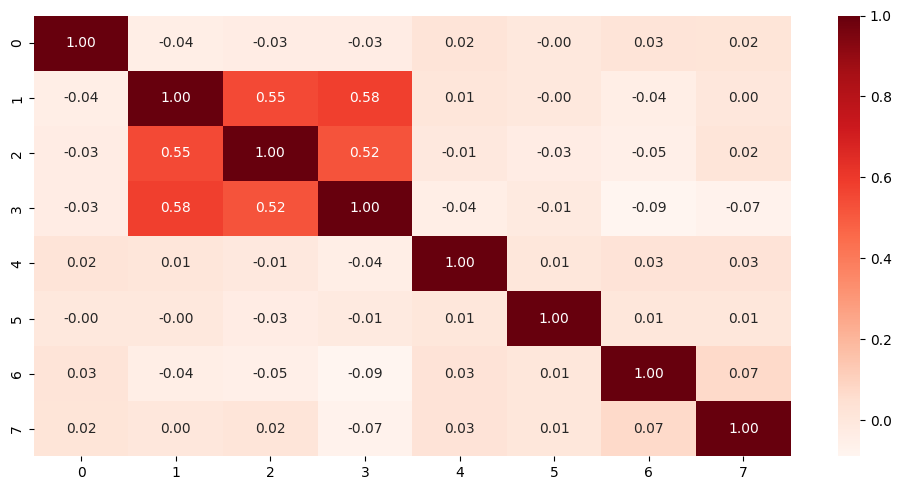

In [33]:
##Pearson daily change correlation ## talán moving avg lehetne haszálni híreknél 
plt.figure(figsize=default_figsize)
sns.heatmap(stationary_section2.corr(), annot=True, cmap="Reds", fmt=".2f"); ## period maybe more than one
plt.tight_layout()
plt.savefig("charts/section2/section2_heatmap.png")
plt.show()

### Cross Correlation - Calculate appropriate time lags

In [ ]:
ccf_plot(stationary_section2, "eth_close", "ethereum_search_trend", save_name="charts/section2/ccf_searcht.png", maxlags=30, title="Ethereum Searchtrend", d=[0.005, 0.002, 0.005, 0.002])

In [ ]:
ccf_plot(stationary_section2, "eth_close", "unique_whales", save_name="charts/section2/ccf_whales.png", maxlags=30, title="Whales Number", d=[0.005, 0.002, 0.005, 0.002])

In [ ]:
ccf_plot(stationary_section2, "eth_close", "whales_tx_number", save_name="charts/section2/ccf_whalestxnumber.png", maxlags=30, title="Whales transaction number", d=[0.005, 0.002, 0.005, 0.002])

In [ ]:
ccf_plot(stationary_section2, "eth_close", "whales_tx_total_value", save_name="charts/section2/ccf_whalestxvalue.png", maxlags=30, title="Whales transactions volume", d=[0.005, 0.002, 0.005, 0.002])

In [ ]:
ccf_plot(stationary_section2, "eth_close", "news_sentiment", save_name="charts/section2/ccf_news.png", maxlags=30, title="News Sentiment", d=[0.005, 0.002, 0.005, 0.002])

In [ ]:
ccf_plot(stationary_section2, "eth_close", "reddit_sentiment", save_name="charts/section2/ccf_reddit.png", maxlags=30, title="Reddit Sentiment", d=[0.005, 0.002, 0.005, 0.002])

In [ ]:
ccf_plot(stationary_section2, "eth_close", "twitter_sentiment", save_name="charts/section2/ccf_twitter.png", maxlags=30, title="Twitter Sentiment", d=[0.005, 0.002, 0.005, 0.002])

Cross-correlation measures the degree of similarity or correlation between two time series as a function of the time lag between them. It is a measure of linear dependence between two variables, where the cross-correlation coefficient ranges from -1 to 1, with 0 indicating no correlation and -1 or 1 indicating perfect negative or positive correlation, respectively. Cross-correlation is useful for identifying lagged relationships between two time series, such as how a change in one series affects the other after a certain time delay.

Granger causality, on the other hand, measures the degree to which one time series can be used to predict another time series. It is a statistical test that determines whether one time series has predictive power over the other, after taking into account their shared history. Granger causality is based on the idea that if a time series X "Granger-causes" another time series Y, then past values of X should contain information that helps predict future values of Y better than using only past values of Y. Granger causality is useful for identifying causal relationships between two time series, such as whether changes in one series lead to changes in the other series.

In summary, cross-correlation measures the degree of similarity or correlation between two time series as a function of the time lag between them, while Granger causality measures the degree to which one time series can be used to predict another time series. Cross-correlation is useful for identifying lagged relationships between two time series, while Granger causality is useful for identifying causal relationships between two time series.

### Granger Casuality

NEM ÁLTALÁNOS KAPCSOLAT MÉRÉSÉRE SZOLGÁL, HANEM EGYIK VÁLTOZÓ LAG ÉRTÉKEI MENNYIRE SZIGNIFIKÁNSAK A MÁSIK JELENLEGI ÉRTÉKÉBEN

In [ ]:
# ethereum_search_trend
### SECOND COLUMN AFFECTS THE FIRST,  ETHEREUM SEARCH TREND can forecast ETH CLOSE?
### ETHEREUM SEARCH TREND LAG=2 SIGNIFICANT, AND USEFUL FOR PREDICTION
granger_result = grangercausalitytests(stationary_section2[["eth_close", "ethereum_search_trend"]], maxlag=25) ## significant mindenhol ahol p < 0.05, kivéve a végén ahol a p nem kisebb mint <5%

In [ ]:
# unique_whales
### SECOND COLUMN AFFECTS THE FIRST,  unique_whales can forecast ETH CLOSE?
### NOT SIGNIFICANT AT ANY LAG
granger_result = grangercausalitytests(stationary_section2[["eth_close", "unique_whales"]], maxlag=25) ## significant mindenhol ahol p < 0.05, kivéve a végén ahol a p nem kisebb mint <5%

In [ ]:
# whales_tx_number
### SECOND COLUMN AFFECTS THE FIRST,  ETHEREUM SEARCH TREND can forecast ETH CLOSE?
### ETHEREUM SEARCH TREND LAG=57 SIGNIFICANT, AND USEFUL FOR PREDICTION BUT SOMETIMES RANDOM.
granger_result = grangercausalitytests(stationary_section2[["eth_close", "whales_tx_number"]], maxlag=70) ## significant mindenhol ahol p < 0.05, kivéve a végén ahol a p nem kisebb mint <5%

In [ ]:
# whales_tx_total_value
### SECOND COLUMN AFFECTS THE FIRST,  ETHEREUM SEARCH TREND can forecast ETH CLOSE?
### NOT SIGNIFICANT AT PREDICTIONS
granger_result = grangercausalitytests(stationary_section2[["eth_close", "whales_tx_total_value"]], maxlag=70) ## significant mindenhol ahol p < 0.05, kivéve a végén ahol a p nem kisebb mint <5%

In [ ]:
# news_sentiment
### SECOND COLUMN AFFECTS THE FIRST,  ETHEREUM SEARCH TREND can forecast ETH CLOSE?
### NOT SIGNIFICANT
granger_result = grangercausalitytests(stationary_section2[["eth_close", "news_sentiment"]], maxlag=30) ## significant mindenhol ahol p < 0.05, kivéve a végén ahol a p nem kisebb mint <5%

In [ ]:
# reddit_sentiment
### SECOND COLUMN AFFECTS THE FIRST,  ETHEREUM SEARCH TREND can forecast ETH CLOSE?
### NOT SIGNIFICANT
granger_result = grangercausalitytests(stationary_section2[["eth_close", "reddit_sentiment"]], maxlag=30) ## significant mindenhol ahol p < 0.05, kivéve a végén ahol a p nem kisebb mint <5%

In [ ]:
# twitter_sentiment
### SECOND COLUMN AFFECTS THE FIRST,  ETHEREUM SEARCH TREND can forecast ETH CLOSE?
### NOT SIGNIFICANT
granger_result = grangercausalitytests(stationary_section2[["eth_close", "twitter_sentiment"]], maxlag=30) ## significant mindenhol ahol p < 0.05, kivéve a végén ahol a p nem kisebb mint <5%

## Section 3

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2017-09-01 to 2023-03-07
Freq: D
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   eth_low                   2014 non-null   float64
 1   eth_high                  2014 non-null   float64
 2   eth_open                  2014 non-null   float64
 3   eth_close                 2014 non-null   float64
 4   eth_volume                2014 non-null   float64
 5   month                     2014 non-null   object 
 6   eth_qav                   2014 non-null   float64
 7   eth_num_trades            2014 non-null   float64
 8   eth_taker_base_vol        2014 non-null   float64
 9   eth_taker_quote_vol       2014 non-null   float64
 10  btc_close                 2014 non-null   float64
 11  btc_volume                2014 non-null   float64
 12  btc_num_trades            2014 non-null   float64
 13  btc_qav                   2014 non-nu

In [16]:
section3 = df[["macd", "signal", "hist", "rsi", "stochastic_oscillator", "ma_12", "ma_26", "ema_12", "ema_26", "obv", "mfi", "upper_band", "middle_band", "lower_band", "eth_close", "eth_open", "eth_high", "eth_low"]]

In [17]:
section3.tail()

,macd,signal,hist,rsi,stochastic_oscillator,ma_12,ma_26,ema_12,ema_26,obv,mfi,upper_band,middle_band,lower_band,eth_close,eth_open,eth_high,eth_low
date,,,,,,,,,,,,,,,,,,
2023-03-03,9.490106,18.102317,-8.612212,44.984486,53.485762,1635.137500,1619.542308,1635.137500,1619.542308,3.841633e+07,46.163045,1742.395705,1628.7715,1515.147295,1569.45,1647.86,1649.25,1544.39
2023-03-04,4.027388,15.287331,-11.259944,44.719157,13.754116,1623.759167,1617.713077,1623.759167,1617.713077,3.817869e+07,42.075393,1736.052986,1631.3665,1526.680014,1566.73,1569.45,1577.53,1549.12
2023-03-05,-0.469926,12.135880,-12.605806,44.495751,12.261251,1615.827500,1613.618846,1615.827500,1613.618846,3.787944e+07,47.671787,1726.595105,1634.3335,1542.071895,1564.58,1566.74,1588.77,1553.05
2023-03-06,-3.887594,8.931185,-12.818779,44.670203,11.504274,1609.385833,1610.365385,1609.385833,1610.365385,3.818715e+07,41.166922,1725.379368,1634.8400,1544.300632,1565.84,1564.57,1583.49,1554.44
2023-03-07,-6.830467,5.778855,-12.609322,44.209404,12.451384,1602.005000,1611.004231,1602.005000,1611.004231,3.774921e+07,41.973275,1723.229654,1629.1920,1535.154346,1561.96,1565.84,1584.49,1536.14


### MACD+Signal+Hist

MACD is a momentum indicator which shows the relationship between the two moving averages, i.e. 26 EMA and 12 EMA.

It consists of the MACD line and the signal line. The MACD line is the difference between the 26 EMA and 12 EMA, and the signal line is 9 EMA.

The buying signal is generated by MACD when the MACD line crosses the signal line from below, and the selling signal is generated when the MACD line crosses the signal line from above, as shown below:

In [22]:
section3.rename(columns={"hist": "histogram"}, inplace=True)

C:\Users\Dani\AppData\Local\Temp\ipykernel_300\2148761040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  section3.rename(columns={"hist": "histogram"}, inplace=True)


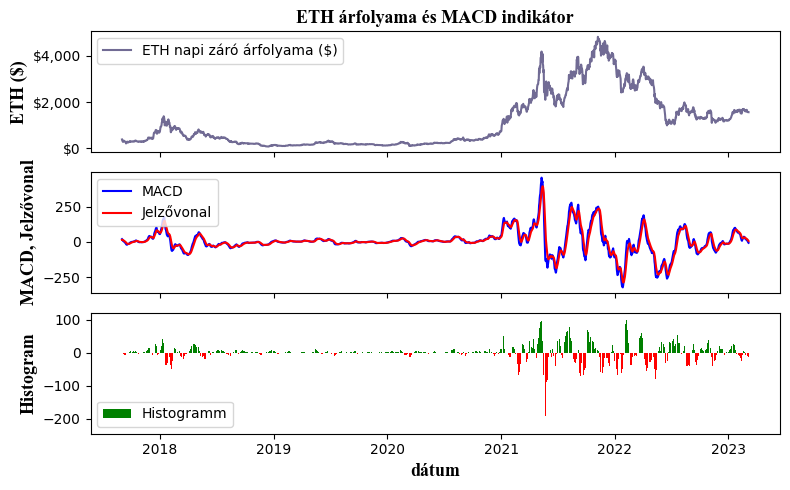

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 5), sharex=True)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}

ax[0].set_title("ETH árfolyama és MACD indikátor", **font)
ax[0].set_ylabel("ETH ($)", font)
ax[0].plot(section3.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax[0].legend()
ax[0].yaxis.set_major_formatter("${x:,.0f}")


ax[1].plot(section3.index, section3.macd, color="blue", label="MACD")
ax[1].plot(section3.index, section3.signal, color="red", label="Jelzővonal")
ax[1].set_ylabel('MACD, Jelzővonal', **font)
ax[1].legend(loc=2)

colors = np.where(section3["histogram"] >= 0, 'g', 'r')
ax[2].bar(section3.index, section3.histogram, label="Histogramm", color=colors)
ax[2].set_xlabel('dátum', **font)
ax[2].set_ylabel('Histogram', **font)
ax[2].legend(loc=3)
plt.tight_layout()
plt.savefig("charts/section3/macd_signal.png")
plt.show()

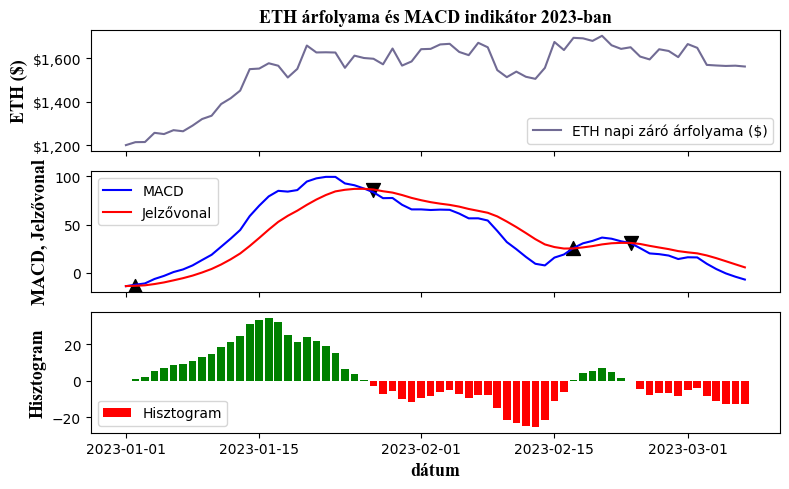

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 5), sharex=True)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}


data_2023 = section3.loc[pd.to_datetime("2023-01-01"):]

ax[0].set_title("ETH árfolyama és MACD indikátor 2023-ban", **font)
ax[0].set_ylabel("ETH ($)", font)
ax[0].plot(data_2023.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax[0].legend()
ax[0].yaxis.set_major_formatter("${x:,.0f}")


ax[1].plot(data_2023.index, data_2023.macd, color="blue", label="MACD")
ax[1].plot(data_2023.index, data_2023.signal, color="red", label="Jelzővonal")
ax[1].set_ylabel('MACD, Jelzővonal', **font)
ax[1].legend(loc=2)

overlap_index = np.where((data_2023.macd >= data_2023.signal) & (data_2023.macd.shift(1) < data_2023.signal.shift(1)))[0]
ax[1].scatter(data_2023.index[overlap_index], data_2023.signal[overlap_index], color='black', marker='^', s=100)
overlap_index = np.where((data_2023.signal >= data_2023.macd) & (data_2023.signal.shift(1) < data_2023.macd.shift(1)))[0]
ax[1].scatter(data_2023.index[overlap_index], data_2023.signal[overlap_index], color='black', marker='v', s=100)


colors = np.where(data_2023.histogram >= 0, 'g', 'r')
ax[2].bar(data_2023.index, data_2023.histogram, label="Hisztogram", color=colors)
ax[2].set_xlabel('dátum', **font)
ax[2].set_ylabel('Hisztogram', **font)
ax[2].legend(loc=3)
plt.tight_layout()
plt.savefig("charts/section3/macd_signal_20231.png")
plt.show()

### RSI
The indicator oscillates between zero and 100. Signals can be spotted by traders when they look for divergences and when the indicator crosses over the centreline, which is 50. When RSI crosses above 50 signals positive and uptrend momentum; though, if the RSI hits 70 or above, then it is an indication of overbought conditions.

<img src="rsi.jpg" width=360 height=360/>

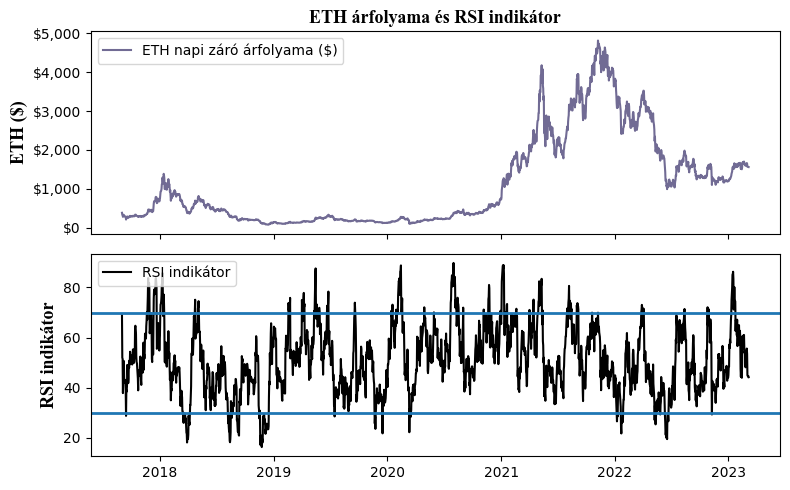

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex=True)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}

ax[0].set_title("ETH árfolyama és RSI indikátor", **font)
ax[0].set_ylabel("ETH ($)", font)
ax[0].plot(section3.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax[0].legend()
ax[0].yaxis.set_major_formatter("${x:,.0f}")


ax[1].plot(section3.index, section3.rsi, color="black", label="RSI indikátor")
ax[1].set_ylabel('RSI indikátor', **font)
ax[1].legend(loc=2)
ax[1].axhline(y=30, linewidth=2)
ax[1].axhline(y=70, linewidth=2)


plt.tight_layout()
plt.savefig("charts/section3/rsi.png")
plt.show()

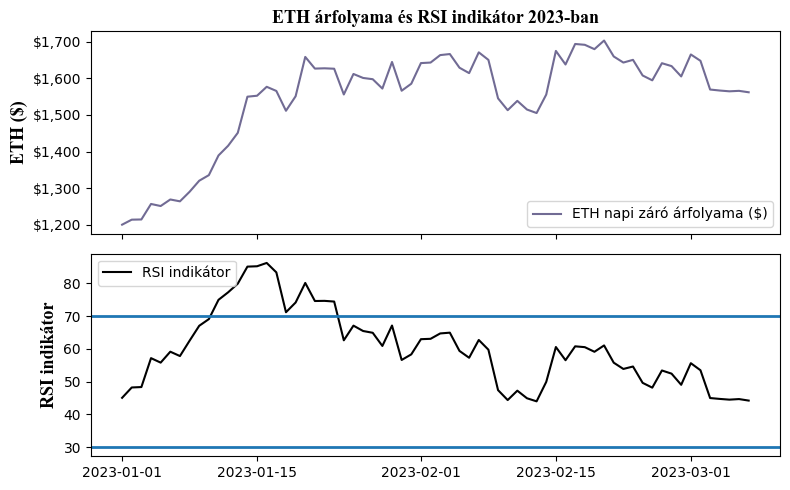

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex=True)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}

data_2023 = section3.loc[pd.to_datetime("2023-01-01"):]

ax[0].set_title("ETH árfolyama és RSI indikátor 2023-ban", **font)
ax[0].set_ylabel("ETH ($)", font)
ax[0].plot(data_2023.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax[0].legend()
ax[0].yaxis.set_major_formatter("${x:,.0f}")


ax[1].plot(data_2023.index, data_2023.rsi, color="black", label="RSI indikátor")
ax[1].set_ylabel('RSI indikátor', **font)
ax[1].legend(loc=2)
ax[1].axhline(y=30, linewidth=2)
ax[1].axhline(y=70, linewidth=2)


plt.tight_layout()
plt.savefig("charts/section3/rsi_2023.png")
plt.show()

### Stochastic Oscillator
Stochastics help in identifying the overbought and oversold zones and oscillates in the range of 0 and 100. When this indicator is above 80, it is considered an overbought zone; when it is below 20, it shows an oversold zone.

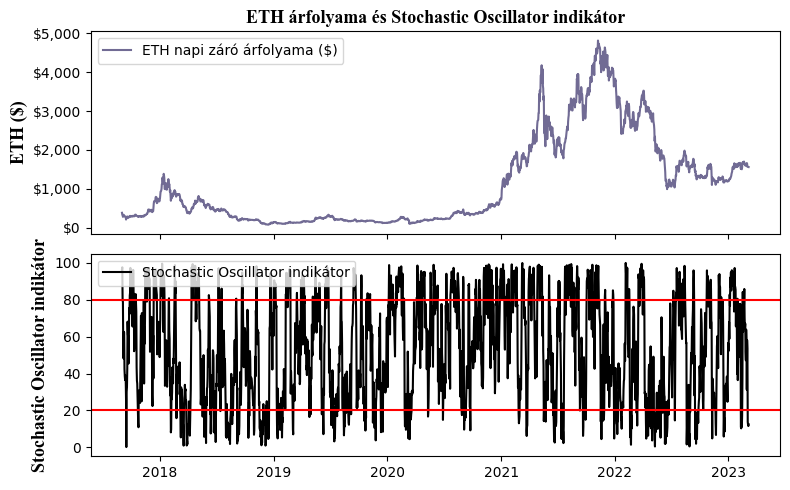

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex=True)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}

ax[0].set_title("ETH árfolyama és Stochastic Oscillator indikátor", **font)
ax[0].set_ylabel("ETH ($)", font)
ax[0].plot(section3.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax[0].legend()
ax[0].yaxis.set_major_formatter("${x:,.0f}")


ax[1].plot(section3.index, section3.stochastic_oscillator, color="black", label="Stochastic Oscillator indikátor")
ax[1].set_ylabel('Stochastic Oscillator indikátor', **font)
ax[1].legend(loc=2)
ax[1].axhline(y=20, color="red")
ax[1].axhline(y=80, color="red")


plt.tight_layout()
plt.savefig("charts/section3/stochastic_osc.png")
plt.show()

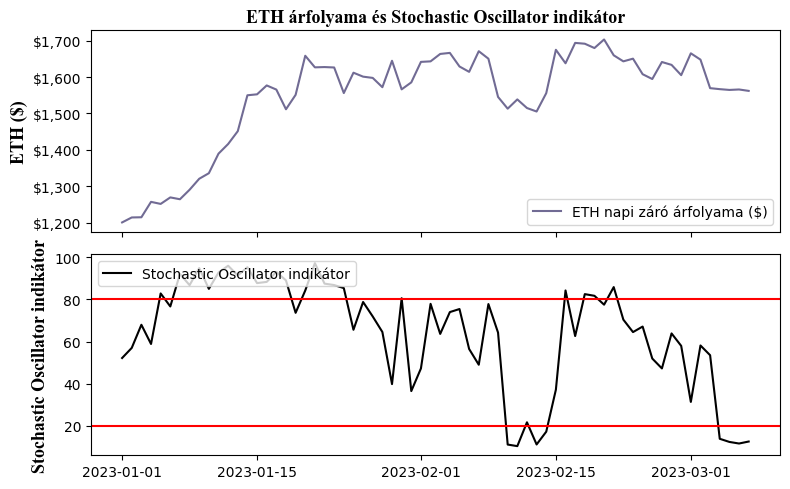

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex=True)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
data_2023 = section3.loc[pd.to_datetime("2023-01-01"):]

ax[0].set_title("ETH árfolyama és Stochastic Oscillator indikátor", **font)
ax[0].set_ylabel("ETH ($)", font)
ax[0].plot(data_2023.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax[0].legend()
ax[0].yaxis.set_major_formatter("${x:,.0f}")


ax[1].plot(data_2023.index, data_2023.stochastic_oscillator, color="black", label="Stochastic Oscillator indikátor")
ax[1].set_ylabel('Stochastic Oscillator indikátor', **font)
ax[1].legend(loc=2)
ax[1].axhline(y=20, color="red")
ax[1].axhline(y=80, color="red")


plt.tight_layout()
plt.savefig("charts/section3/stochastic_osc_2023.png")
plt.show()

### MA 12 és MA 26 Day
Moving Average

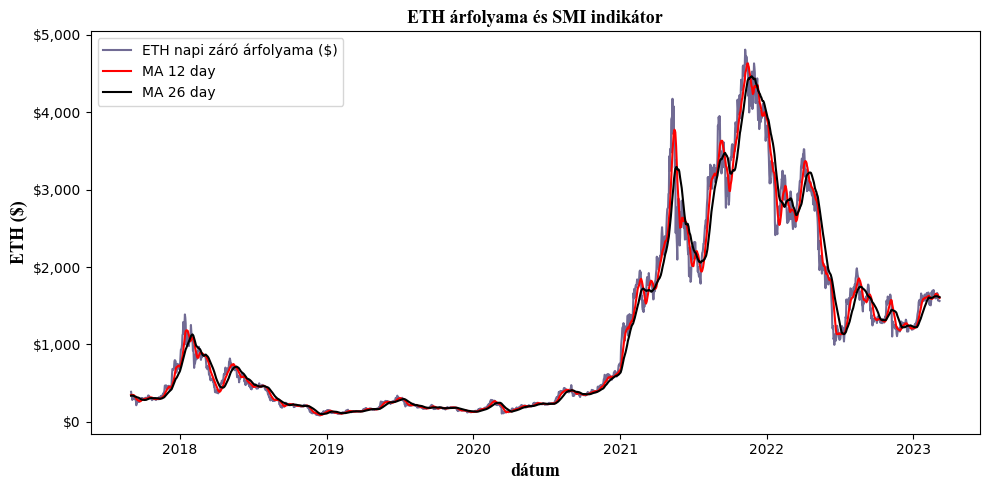

In [32]:
fig, ax = plt.subplots(figsize=default_figsize)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}

ax.set_title("ETH árfolyama és SMI indikátor", **font)
ax.set_ylabel("ETH ($)", **font)
ax.plot(section3.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.plot(section3.ma_12, color="red", label="MA 12 day")
ax.plot(section3.ma_26, color="black", label="MA 26 day")
ax.set_xlabel("dátum", **font)

ax.legend()
plt.tight_layout()
plt.savefig("charts/section3/ma12_16.png")
plt.show()

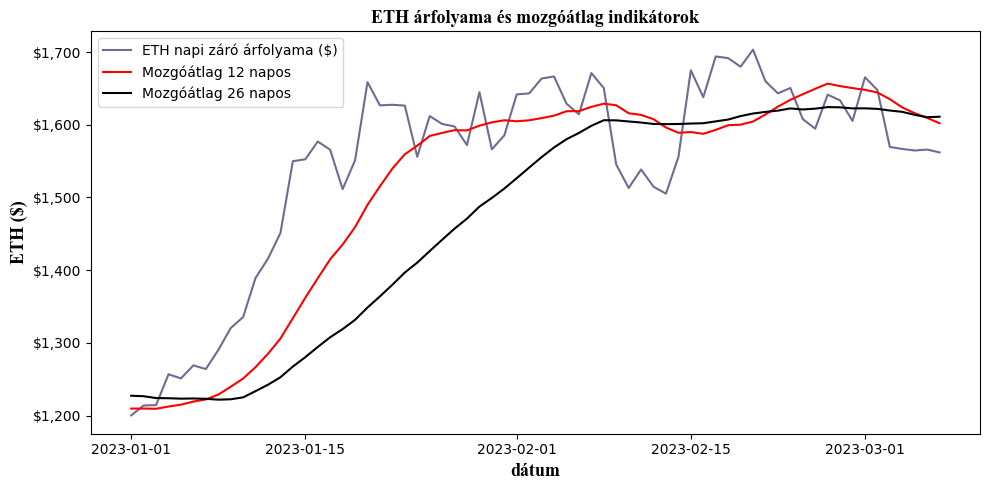

In [33]:
fig, ax = plt.subplots(figsize=default_figsize)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
data_2023 = section3.loc[pd.to_datetime("2023-01-01"):]

ax.set_title("ETH árfolyama és mozgóátlag indikátorok", **font)
ax.set_ylabel("ETH ($)", font)
ax.plot(data_2023.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.plot(data_2023.ma_12, color="red", label="Mozgóátlag 12 napos")
ax.plot(data_2023.ma_26, color="black", label="Mozgóátlag 26 napos")
ax.set_xlabel("dátum", **font)


ax.legend()
plt.tight_layout()
plt.savefig("charts/section3/ma12_16_2023.png")
plt.show()

### EMA 12-26 Day
Exponential moving average (EMA)

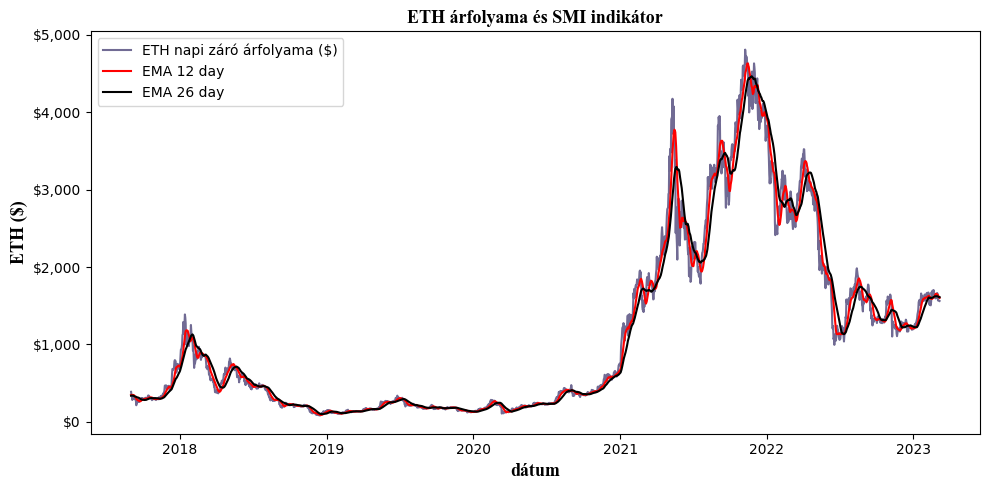

In [34]:
fig, ax = plt.subplots(figsize=default_figsize)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}

ax.set_title("ETH árfolyama és SMI indikátor", **font)
ax.set_ylabel("ETH ($)", **font)
ax.plot(section3.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.plot(section3.ema_12, color="red", label="EMA 12 day")
ax.plot(section3.ema_26, color="black", label="EMA 26 day")
ax.set_xlabel("dátum", **font)

ax.legend()
plt.tight_layout()
plt.savefig("charts/section3/ema12_16.png")
plt.show()

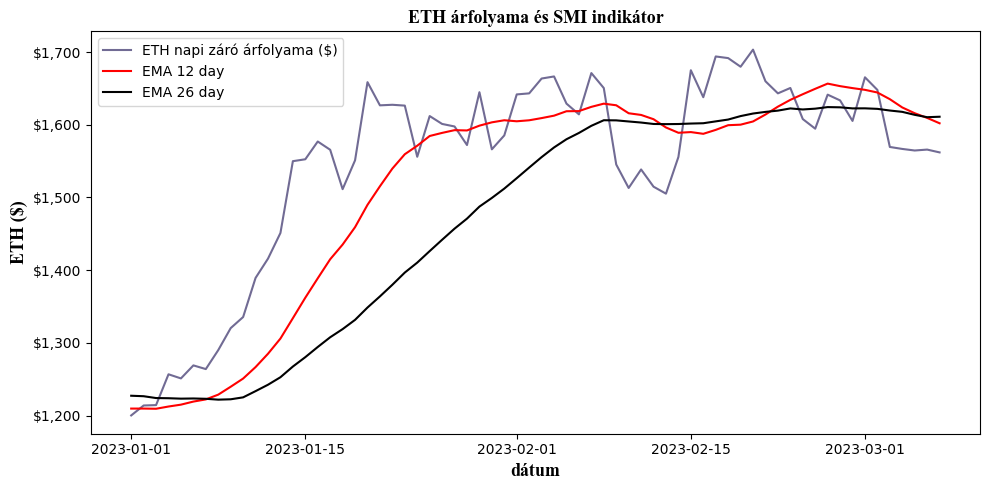

In [35]:
fig, ax = plt.subplots(figsize=default_figsize)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
data_2023 = section3.loc[pd.to_datetime("2023-01-01"):]

ax.set_title("ETH árfolyama és SMI indikátor", **font)
ax.set_ylabel("ETH ($)", font)
ax.plot(data_2023.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.plot(data_2023.ema_12, color="red", label="EMA 12 day")
ax.plot(data_2023.ema_26, color="black", label="EMA 26 day")
ax.set_xlabel("dátum", **font)


ax.legend()
plt.tight_layout()
plt.savefig("charts/section3/ema12_16_2023.png")
plt.show()

### On-Balance Volume
On Balance Volume (OBV) is the volume indicator that calculates the buying and selling pressure as a cumulative indicator which sums up the volume on up days and subtracts volume on down days.

When the stock closes higher than the previous close, all of the day’s volume is considered up-volume. Similarly, when the stock closes lower than the previous close, then all of the day’s volume is considered down-volume. Rather than the value, one should focus on its direction.

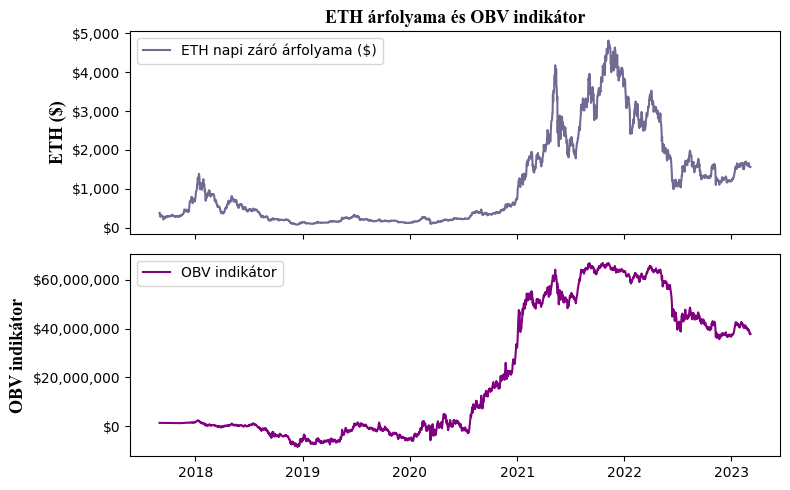

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex=True)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}

ax[0].set_title("ETH árfolyama és OBV indikátor", **font)
ax[0].set_ylabel("ETH ($)", font)
ax[0].plot(section3.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax[0].legend()
ax[0].yaxis.set_major_formatter("${x:,.0f}")


ax[1].plot(section3.index, section3.obv, color="purple", label="OBV indikátor")
ax[1].set_ylabel('OBV indikátor', **font)
ax[1].legend(loc=2)
ax[1].yaxis.set_major_formatter("${x:,.0f}")


plt.tight_layout()
plt.savefig("charts/section3/obv.png")
plt.show()

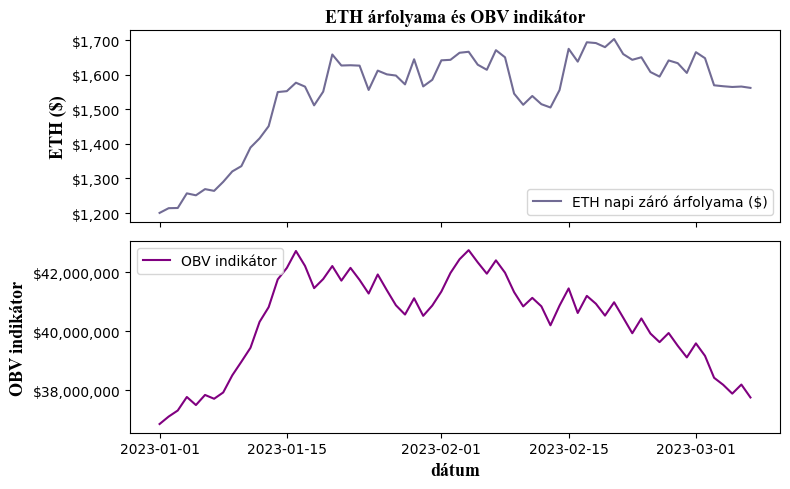

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex=True)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
data_2023 = section3.loc[pd.to_datetime("2023-01-01"):]

ax[0].set_title("ETH árfolyama és OBV indikátor", **font)
ax[0].set_ylabel("ETH ($)", font)
ax[0].plot(data_2023.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax[0].legend()
ax[0].yaxis.set_major_formatter("${x:,.0f}")


ax[1].plot(data_2023.index, data_2023.obv, color="purple", label="OBV indikátor")
ax[1].set_ylabel('OBV indikátor', **font)
ax[1].legend(loc=2)
ax[1].yaxis.set_major_formatter("${x:,.0f}")
ax[1].set_xlabel("dátum", **font)

plt.tight_layout()
plt.savefig("charts/section3/obv_2023.png")
plt.show()

### MFI 
The Money Flow Index (MFI) can be interpreted similarly to RSI. Trading signals are generated by this indicator when the stock signals bullish or bearish divergence, crossovers and when the stock is in the overbought or oversold zone.

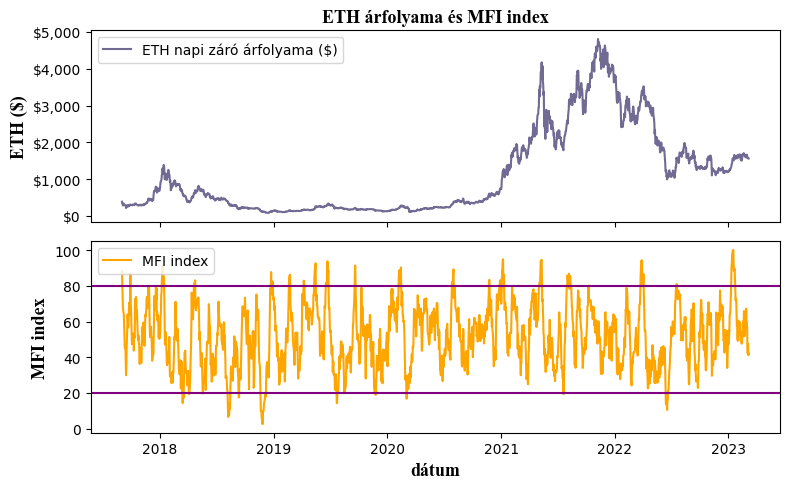

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex=True)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}

ax[0].set_title("ETH árfolyama és MFI index", **font)
ax[0].set_ylabel("ETH ($)", font)
ax[0].plot(section3.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax[0].legend()
ax[0].yaxis.set_major_formatter("${x:,.0f}")


ax[1].plot(section3.index, section3.mfi, color="orange", label="MFI index")
ax[1].set_ylabel('MFI index', **font)
ax[1].legend(loc=2)
ax[1].yaxis.set_major_formatter("{x:,.0f}")
ax[1].axhline(y=20, color="purple")
ax[1].axhline(y=80, color="purple")
ax[1].set_xlabel("dátum", **font)

plt.tight_layout()
plt.savefig("charts/section3/mfi.png")
plt.show()

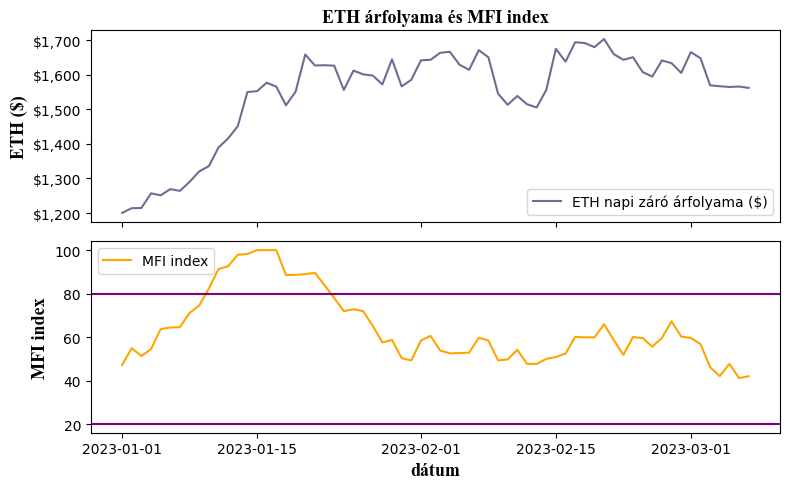

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex=True)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
data_2023 = section3.loc[pd.to_datetime("2023-01-01"):]

ax[0].set_title("ETH árfolyama és MFI index", **font)
ax[0].set_ylabel("ETH ($)", font)
ax[0].plot(data_2023.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax[0].legend()
ax[0].yaxis.set_major_formatter("${x:,.0f}")


ax[1].plot(data_2023.index, data_2023.mfi, color="orange", label="MFI index")
ax[1].set_ylabel('MFI index', **font)
ax[1].legend(loc=2)
ax[1].yaxis.set_major_formatter("{x:,.0f}")
ax[1].axhline(y=20, color="purple")
ax[1].axhline(y=80, color="purple")
ax[1].set_xlabel("dátum", **font)

plt.tight_layout()
plt.savefig("charts/section3/mfi_2023.png")
plt.show()

### Bollinger Bands - Upper and Lower Band
Bollinger Bands consist of 3 bands: the upper, lower and middle bands. The middle band is the 20 days or bars moving average, the upper band is +2 Standard Deviation, and the lower band is the -2 Standard Deviation of the middle band.

When the Volatility in the market increases, these bands expand, and when the Volatility decreases, these bands contract. Traders can trade with the Bollinger bands when the prices break out from either side of the upper or lower bands after the low Volatility or consolidation phase.

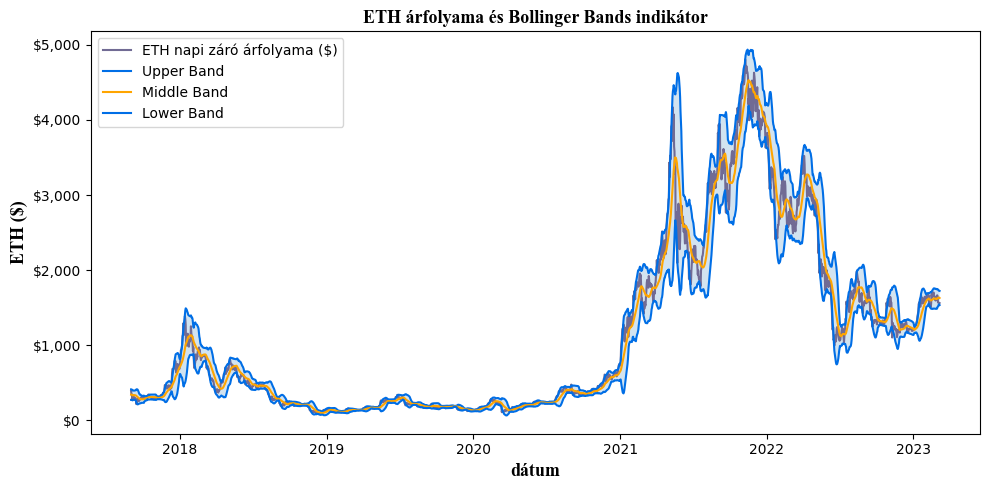

In [40]:
fig, ax = plt.subplots(figsize=default_figsize)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}

ax.set_title("ETH árfolyama és Bollinger Bands indikátor", **font)
ax.set_ylabel("ETH ($)", **font)
ax.plot(section3.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.plot(section3.upper_band, color="#006ee6", label="Upper Band")
ax.plot(section3.middle_band, color="orange", label="Middle Band")
ax.plot(section3.lower_band, color="#006ee6", label="Lower Band")
ax.set_xlabel("dátum", **font)

plt.fill_between(section3.index, section3.upper_band, section3.lower_band, alpha=0.2)

ax.legend()
plt.tight_layout()
plt.savefig("charts/section3/bollinger_bands.png")
plt.show()

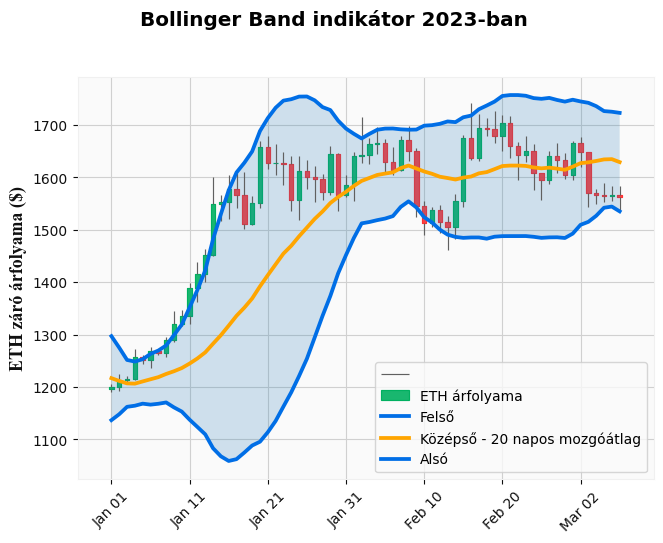

In [41]:
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}

data_2023 = section3.loc[pd.to_datetime("2023-01-01"):]

upper_bb_plot = mpf.make_addplot(data_2023.upper_band, color='#006ee6')
middle_bb_plot = mpf.make_addplot(data_2023.middle_band, color='orange')
lower_bb_plot = mpf.make_addplot(data_2023.lower_band, color='#006ee6')

fig, ax = mpf.plot(data_2023.rename(columns={"eth_open": "open", "eth_close": "close", "eth_high": "high", "eth_low": "low"}), 
         ylabel="", title="Bollinger Band indikátor 2023-ban",
         type='candle', style="yahoo", addplot=[upper_bb_plot, middle_bb_plot, lower_bb_plot],
        fill_between=dict(y1=data_2023.upper_band.values,y2=data_2023.lower_band.values, alpha=0.2),
        returnfig=True)
ax[0].yaxis.tick_left()
ax[0].set_ylabel("ETH záró árfolyama ($)", fontdict=font)
ax[0].yaxis.set_label_position("left")

ax[0].legend(["","ETH árfolyama", "Felső", "Középső - 20 napos mozgóátlag", "Alsó"], loc=0)

plt.savefig("charts/section3/bollinger_bands_2023.png")
plt.show()

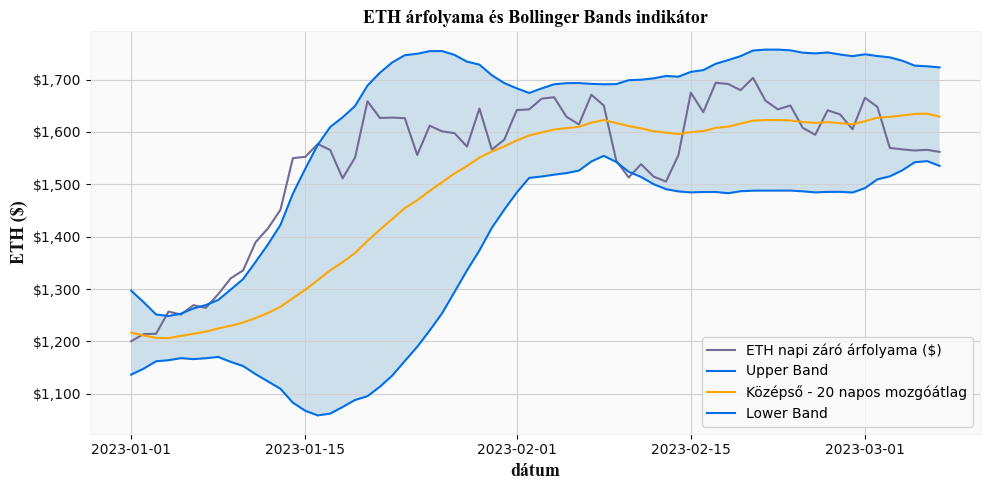

In [42]:
fig, ax = plt.subplots(figsize=default_figsize)
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
data_2023 = section3.loc[pd.to_datetime("2023-01-01"):]

ax.set_title("ETH árfolyama és Bollinger Bands indikátor", **font)
ax.set_ylabel("ETH ($)", **font)
ax.plot(data_2023.eth_close, color=color6, label="ETH napi záró árfolyama ($)")
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.plot(data_2023.upper_band, color="#006ee6", label="Upper Band")
ax.plot(data_2023.middle_band, color="orange", label="Középső - 20 napos mozgóátlag")
ax.plot(data_2023.lower_band, color="#006ee6", label="Lower Band")
ax.set_xlabel("dátum", **font)

plt.fill_between(data_2023.index, data_2023.upper_band, data_2023.lower_band, alpha=0.2)

ax.legend()
plt.tight_layout()
plt.savefig("charts/section3/testbollinger_bands.png")
plt.show()

#### Stationary3

In [ ]:
# Find columns that contain negative values
cols_with_negatives = section3.columns[section3.lt(0).any()]

# Print the column names
print(cols_with_negatives)

In [ ]:
stationary_section3 = np.log(section3.drop(columns=cols_with_negatives)).diff()

In [ ]:
stationary_section3[cols_with_negatives] = section3[cols_with_negatives].diff()

In [ ]:
stationary_section3 = stationary_section3.iloc[1:] ##drop nan first row

In [ ]:
stationary_section3.dropna(inplace=True)

In [ ]:
stationary_section3.isna().sum()

In [ ]:
for col in stationary_section3:
    stationary_section3[col]
    print(col)
    is_stationary(stationary_section3[col])

In [ ]:
stationary_section3 = stationary_section3[[col for col in stationary_section3 if "eth_close" != col] + ["eth_close"]]

## Test phase

In [ ]:
test = df[[i for i in df if i != "month"]]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
test = pd.DataFrame(scaler.fit_transform(df.drop(columns="month")), columns=df.drop(columns="month").columns)

In [ ]:
X = test.drop(labels=['eth_close'], axis=1)
y = test["eth_close"]

In [ ]:
X_train = X.iloc[:1611, :]
y_train = y.iloc[:1611]

X_test = X.iloc[1611:, :]
y_test = y.iloc[1611:]


In [ ]:
X_test.shape

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define your input data
# In this example, we have 3 features and 100 samples
X = X_train

# Define your output data
# In this example, we want to predict a single number for each sample
y = y_train

# Define your model architecture
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(None, 39)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(Dense(1))

# Compile your model
model.compile(loss='mse', optimizer='adam')

# Train your model
model.fit(X.values.reshape(1611, 1, 39), y, epochs=20)

# Use your model to make predictions
predictions = model.predict(X_test.values.reshape(403,1,39))


In [ ]:
print(y_test)

In [ ]:
predictions = predictions.reshape(403,1)

In [ ]:
plt.plot(predictions)

In [ ]:
plt.plot(y_test)

### APPENDIX

### Plot shifted correlation between eth_volume and eth_num_trades

In [ ]:
is_stationary(np.log(basic.eth_volume).diff().dropna())

In [ ]:
is_stationary(np.log(basic.eth_close).diff().dropna())

In [ ]:
stationary_eth_close = np.log(basic.eth_close).diff().dropna()

In [ ]:
stationary_eth_volume = np.log(basic.eth_volume).diff().dropna()

In [ ]:
stationary_eth_num_trades = np.log(basic.eth_num_trades).diff().dropna()

In [ ]:
from scipy import signal
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_ielts = ccf_values(stationary_eth_close, stationary_eth_volume)
ccf_ielts

In [ ]:
lags = signal.correlation_lags(len(stationary_eth_close), len(stationary_eth_volume))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = color6, lw = 1,  linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = color6, lw = 1, 
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation Eth Close and ETH Volume', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_ielts)

In [ ]:
correlation = signal.correlate(stationary_eth_close, stationary_eth_volume, mode="full")
lags = signal.correlation_lags(stationary_eth_close.size, stationary_eth_volume.size, mode="full")
lag = lags[np.argmax(correlation)]
print("Most effective lag:", lag)
np.max(ccf_ielts), np.min(ccf_ielts)

In [ ]:
##Num trades

In [ ]:
ccf_ielts = ccf_values(stationary_eth_close, stationary_eth_num_trades)
lags = signal.correlation_lags(len(stationary_eth_close), len(stationary_eth_num_trades))
ccf_plot(lags, ccf_ielts)

In [ ]:
lag = lags[np.argmax(correlation)]

In [ ]:
lag

### BACKUP

In [ ]:
def plot_ccf(a, v, lagmax=0, normalize=True, ci=None, a_title="ez", v_title="meg ez" ):
    ##his will generate a plot of the normalized correlation betwen a and v at different shifts of v along a. 
    #The lagmax argument controls the maximum lag value to plot, and the normalize argument controls 
    #whether to normalize the arrays before computing the correlation.
    fig, ax = plt.subplots(figsize=default_figsize)
    ax.axvline(x=0, color="black", linewidth=2)
    font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
    
    if normalize:
        a = (a - np.mean(a)) / (np.std(a) * len(a))
        v = (v - np.mean(v)) / np.std(v)
    
    correlation = np.correlate(a, v, mode='full')
    x = np.arange(-(len(v)-1), len(a))
    corr_df = pd.DataFrame()
    corr_df["lags"] = x
    corr_df["correlation"] = correlation
    zero_index = corr_df[corr_df["lags"] == 0].index
    zero_index= zero_index.values[0]
    
    if ci is not None:
        ci = np.clip(ci, 0, 100)
        alpha = (100 - ci) / 2
        lower = np.percentile(correlation, alpha)
        upper = np.percentile(correlation, 100 - alpha)
        plt.fill_between(x[zero_index-lagmax:zero_index+lagmax+1], lower, upper, alpha=0.2, color="red")
        
    ax.plot(corr_df.iloc[zero_index-lagmax:zero_index+lagmax+1]["lags"], corr_df.iloc[zero_index-lagmax:zero_index+lagmax+1]["correlation"])
    ax.set_xlabel('Késleltetés', **font)
    ax.set_ylabel('Korreláció', **font)
    
    ax.set_title(f'Kereszt korreláció {a_title} és {v_title} között', **font)
    plt.show()
